## Configuración del Entorno y Librerías

### Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from tabulate import tabulate
from itertools import product

# Modelos de Machine Learning
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import fbeta_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Preprocesamiento
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Model Selection y Validación
from sklearn.model_selection import (
    train_test_split, cross_val_score, learning_curve, validation_curve
)

# Métricas
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, precision_score, recall_score, f1_score
)

## Carga de Datos

In [2]:
data = pd.read_csv(r'docs\Propensity.csv', delimiter=',')

display(data)

,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
0,CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
1,CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0
2,CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,...,Medio,NO DATA,No,NO,1376,0,True,4,21,3
3,CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,...,Medio,SI,Averia muy grave,SI,2015,7256,True,4,48,5
4,CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,...,Alto,NO DATA,No,NO,1818,0,True,3,21,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58044,CLI57905,F,TIPO3,FUEL 1,Alta,M,Contado,SOLTERO,F,Empresa,...,NaN,SI,Averia muy grave,SI,6832,12528,False,5,38,0
58045,CLI57926,K,TIPO7,FUEL 1,Alta,A,Contado,NaN,NaN,Empresa,...,Medio-Bajo,NO DATA,No,SI,0,22072,False,3,54,0
58046,CLI57952,K,TIPO7,FUEL 1,Alta,A,Contado,CASADO,M,Empresa,...,Medio,NO DATA,No,NO,0,8352,False,8,63,0
58047,CLI58038,G,TIPO5,FUEL 2,Media,M,Contado,CASADO,M,Empresa,...,Medio-Bajo,NO DATA,No,NO,2786,10441,False,13,62,0


In [3]:
data.dtypes

CODE               object
PRODUCTO           object
TIPO_CARROCERIA    object
COMBUSTIBLE        object
Potencia           object
TRANS              object
FORMA_PAGO         object
ESTADO_CIVIL       object
GENERO             object
OcupaciOn          object
PROVINCIA          object
Campanna1          object
Campanna2          object
Campanna3          object
Zona_Renta         object
REV_Garantia       object
Averia_grave       object
QUEJA_CAC          object
COSTE_VENTA         int64
km_anno             int64
Mas_1_coche          bool
Revisiones          int64
Edad_Cliente        int64
Tiempo              int64
dtype: object

In [4]:
print(len(data.columns))

24


In [5]:
# Columnas de tipo object
columnas_interes_object = [
    'CODE', 'PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'Potencia', 'TRANS', 
    'FORMA_PAGO', 'ESTADO_CIVIL', 'GENERO', 'OcupaciOn', 'PROVINCIA', 'Campanna1', 
]

for col in columnas_interes_object:
    print(f"-> {col}: {data[col].unique()}")
    


-> CODE: ['CLI1' 'CLI2' 'CLI3' ... 'CLI57952' 'CLI58038' 'CLI58048']
-> PRODUCTO: ['A' 'B' 'C' 'H' 'J' 'D' 'I' 'E' 'F' 'K' 'G']
-> TIPO_CARROCERIA: ['TIPO1' 'TIPO6' 'TIPO4' 'TIPO7' 'TIPO8' 'TIPO2' 'TIPO3' 'TIPO5']
-> COMBUSTIBLE: ['FUEL 1' 'FUEL 2']
-> Potencia: ['Baja' 'Media' 'Alta']
-> TRANS: ['M' 'A']
-> FORMA_PAGO: ['Contado' 'Otros' 'Financiera Marca' 'Financiera Banco']
-> ESTADO_CIVIL: ['CASADO' 'SOLTERO' 'OTROS' 'EN PAREJA' nan]
-> GENERO: ['M' 'F' nan]
-> OcupaciOn: ['Empresa' 'Funcionario' 'Autonomo']
-> PROVINCIA: ['Asturias' 'Toledo' 'Lerida' 'Madrid' 'Santa Cruz de Tenerife'
 'Pontevedra' 'Lacoruna' 'Barcelona' 'Cordoba' 'Guipuzcua' 'Valladolid'
 'Castellon' 'Valencia' 'Las Palmas' 'La Rioja' 'Baleares' 'Zaragoza'
 'Alicante' 'Tarragona' 'Leon' 'Lugo' 'Badajoz' 'Vizcaya' 'Sevilla'
 'Guadalajara' 'Ciudad Real' 'Cantabria' 'Orense' 'Navarra' 'Gerona'
 'Malaga' 'Jaen' 'Murcia' 'Burgos' 'Granada' 'Alava' 'Cuenca' 'Cadiz'
 'Salamanca' 'Albacete' 'Almeria' 'Teruel' 'Segovia' 'P

In [6]:
# Columnas de tipo int64 y bool
columnas_interes_numericas = [
    'Campanna2', 'Campanna3', 'Zona_Renta', 'REV_Garantia', 'Averia_grave', 'QUEJA_CAC', 'COSTE_VENTA', 'km_anno', 'Revisiones', 'Edad_Cliente', 'Tiempo', 'Mas_1_coche'
]

for col in columnas_interes_numericas:
    print(f"-> {col}: {data[col].unique()}")


-> Campanna2: ['NO' 'SI']
-> Campanna3: ['NO' 'SI']
-> Zona_Renta: ['Medio-Bajo' 'Medio' 'Alto' nan 'Otros']
-> REV_Garantia: ['NO DATA' 'SI']
-> Averia_grave: ['Averia muy grave' 'No' 'Averia leve' 'Averia grave' nan]
-> QUEJA_CAC: ['SI' 'NO']
-> COSTE_VENTA: [2892 1376 2015 ... 2278 4655 7151]
-> km_anno: [    0  7187  7256 ...  3787  9219 10441]
-> Revisiones: [ 2  4  3  1  0  7  6  5  8 10  9 12 11 13]
-> Edad_Cliente: [18 53 21 48 56 24 51 44 20 32 52 55 27 26 54 38 46 37 31 45 23 49 57 30
 39 19 29 60 28 25 58 22 50 42 47 62 61 59 41 40 43 64 68 67 69 70 35 71
 34 66 63 33 65 36]
-> Tiempo: [ 0  3  5  4  8  7  6  9  2 10 13 11 14 12]
-> Mas_1_coche: [False  True]


In [7]:
data.describe()

,COSTE_VENTA,km_anno,Revisiones,Edad_Cliente,Tiempo
count,58049.000000,58049.000000,58049.000000,58049.000000,58049.000000
mean,2540.125756,11805.893607,3.529587,47.351255,1.859119
std,1603.556511,10205.363971,2.528413,11.239984,3.091309
min,0.000000,0.000000,0.000000,18.000000,0.000000
25%,1595.000000,0.000000,1.000000,40.000000,0.000000
50%,2353.000000,11486.000000,3.000000,48.000000,0.000000
75%,3301.000000,17927.000000,5.000000,56.000000,4.000000
max,18455.000000,182331.000000,13.000000,71.000000,14.000000


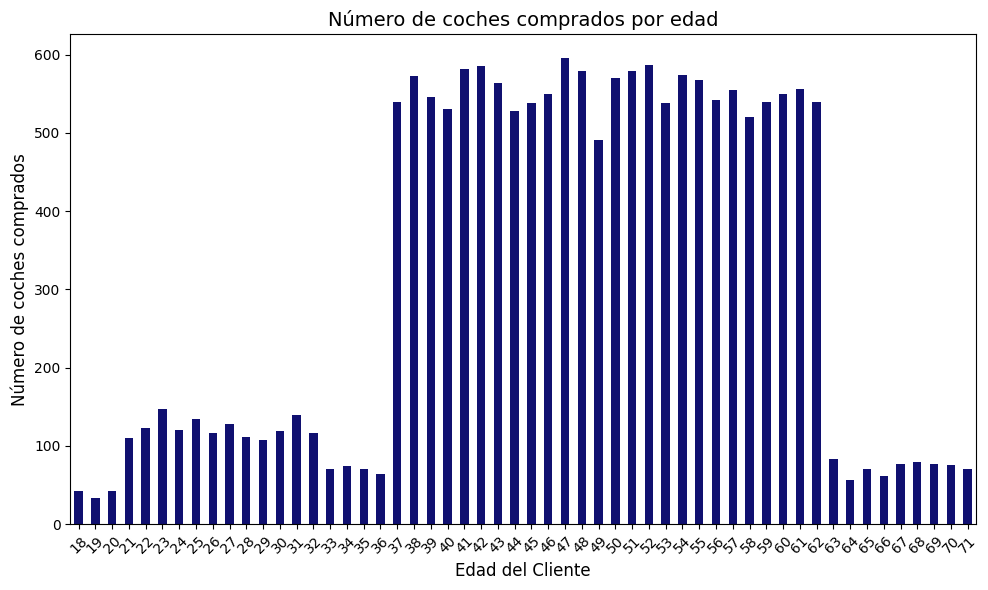

In [8]:
# Si 'Mas_1_coche' es un booleano, puedes convertirlo a un valor entero (1 o 0)
data['Mas_1_coche'] = data['Mas_1_coche'].astype(int)

# Agrupar por edad y contar el número de coches comprados (suma de la columna 'Mas_1_coche')
compras_por_edad = data.groupby('Edad_Cliente')['Mas_1_coche'].sum()

# Graficar la comparación
plt.figure(figsize=(10, 6))
compras_por_edad.plot(kind='bar', color='#101070')  # Usando tu color preferido (Dark Blue)

plt.title('Número de coches comprados por edad', fontsize=14)
plt.xlabel('Edad del Cliente', fontsize=12)
plt.ylabel('Número de coches comprados', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

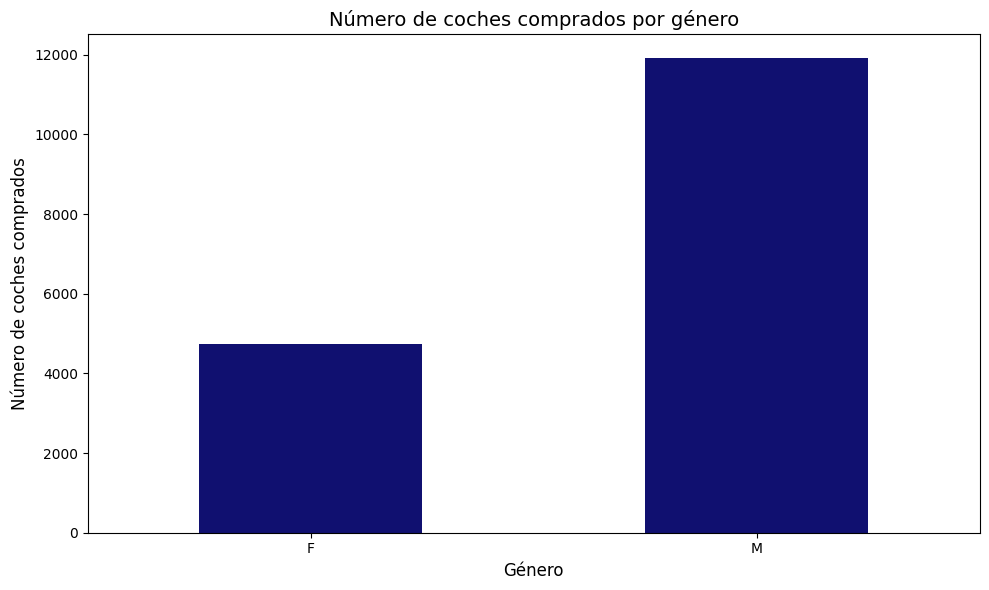

In [9]:
# Agrupar por género y contar el número de coches comprados (suma de la columna 'Mas_1_coche')
compras_por_genero = data.groupby('GENERO')['Mas_1_coche'].sum()

# Graficar la comparación por género
plt.figure(figsize=(10, 6))
compras_por_genero.plot(kind='bar', color='#101070')

plt.title('Número de coches comprados por género', fontsize=14)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Número de coches comprados', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


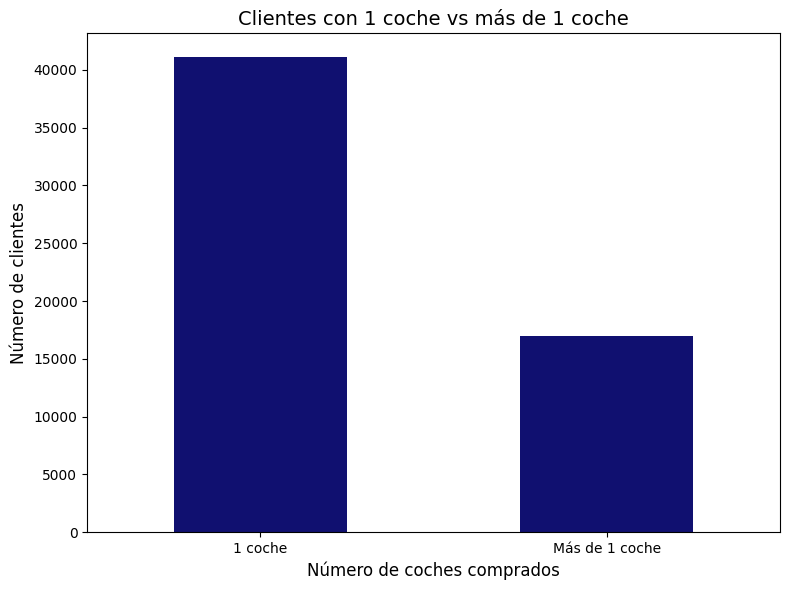

In [10]:
# Agrupar por la categoría de coches comprados (1 o más) y contar el número de clientes en cada categoría
compras_1_vs_mas1 = data.groupby('Mas_1_coche').size()

# Graficar la comparación de clientes con 1 coche o más
plt.figure(figsize=(8, 6))
compras_1_vs_mas1.plot(kind='bar', color='#101070')

plt.title('Clientes con 1 coche vs más de 1 coche', fontsize=14)
plt.xlabel('Número de coches comprados', fontsize=12)
plt.ylabel('Número de clientes', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['1 coche', 'Más de 1 coche'], rotation=0)
plt.tight_layout()

plt.show()


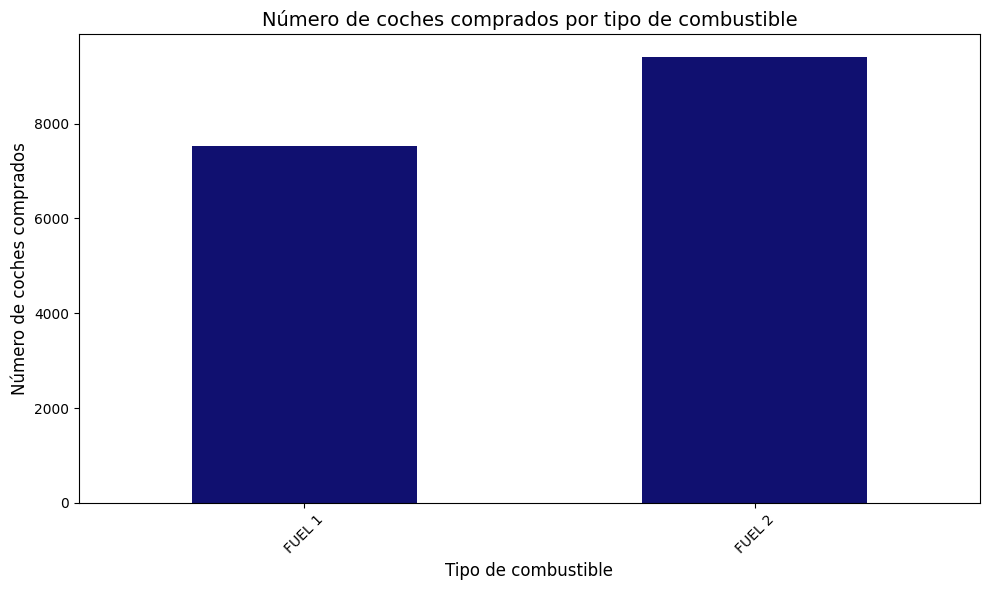

In [11]:
# Agrupar por tipo de combustible y contar el número de coches comprados (suma de la columna 'Mas_1_coche')
compras_por_combustible = data.groupby('COMBUSTIBLE')['Mas_1_coche'].sum()

# Graficar la comparación por tipo de combustible
plt.figure(figsize=(10, 6))
compras_por_combustible.plot(kind='bar', color='#101070')

plt.title('Número de coches comprados por tipo de combustible', fontsize=14)
plt.xlabel('Tipo de combustible', fontsize=12)
plt.ylabel('Número de coches comprados', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [12]:
import pandas as pd

# Supongamos que 'data' es tu DataFrame
# Filtrar los datos donde Mas_1_coche es True
data_multiple_cars = data[data['Mas_1_coche'] == True]

# Contar la frecuencia de cada variable
frequencies = {
    'TIPO_CARROCERIA': data_multiple_cars['TIPO_CARROCERIA'].value_counts(),
    'ESTADO_CIVIL': data_multiple_cars['ESTADO_CIVIL'].value_counts(),
    'GENERO': data_multiple_cars['GENERO'].value_counts(),
    'PROVINCIA': data_multiple_cars['PROVINCIA'].value_counts(),
    'Campanna1': data_multiple_cars['Campanna1'].value_counts(),
    'Campanna2': data_multiple_cars['Campanna2'].value_counts(),
    'Campanna3': data_multiple_cars['Campanna3'].value_counts(),
    'Zona_Renta': data_multiple_cars['Zona_Renta'].value_counts(),
    'REV_Garantia': data_multiple_cars['REV_Garantia'].value_counts(),
    'Revisiones': data_multiple_cars['Revisiones'].value_counts(),
    'Edad_Cliente': data_multiple_cars['Edad_Cliente'].value_counts(),
}

# Mostrar los resultados
for var, count in frequencies.items():
    print(f"Frecuencias de la variable {var}:")
    print(count)
    print("-" * 50)

Frecuencias de la variable TIPO_CARROCERIA:
TIPO_CARROCERIA
TIPO1    7253
TIPO7    5039
TIPO6    2442
TIPO4     959
TIPO8     869
TIPO2     362
TIPO3      14
TIPO5       4
Name: count, dtype: int64
--------------------------------------------------
Frecuencias de la variable ESTADO_CIVIL:
ESTADO_CIVIL
CASADO       12982
SOLTERO       2957
EN PAREJA      406
OTROS          302
Name: count, dtype: int64
--------------------------------------------------
Frecuencias de la variable GENERO:
GENERO
M    11916
F     4742
Name: count, dtype: int64
--------------------------------------------------
Frecuencias de la variable PROVINCIA:
PROVINCIA
Madrid                    4439
Barcelona                 3053
Pontevedra                 639
Valencia                   555
Alicante                   507
Lacoruna                   486
Sevilla                    464
Malaga                     399
Vizcaya                    370
Baleares                   325
Zaragoza                   323
Gerona        

### Label Encoding (Para columnas ordinales)
-> random 

In [108]:
# Lista de columnas ordinales para Label Encoding
label_columns = ['PRODUCTO', 'TIPO_CARROCERIA', 'FORMA_PAGO', 'ESTADO_CIVIL', 'OcupaciOn', 'PROVINCIA', 'Zona_Renta', 'COSTE_VENTA', 'km_anno', 'Revisiones', 'Edad_Cliente', 'Tiempo']  

# Crear un objeto LabelEncoder
le = LabelEncoder()

# Aplicar Label Encoding a las columnas ordinales
for col in label_columns:
    data[col] = le.fit_transform(data[col])  

# Mostrar el DataFrame con las columnas codificadas
print(data.head())

   CODE  PRODUCTO  TIPO_CARROCERIA COMBUSTIBLE Potencia TRANS  FORMA_PAGO  \
0  CLI1         0                0      FUEL 1     Baja     M           0   
1  CLI2         0                0      FUEL 1     Baja     M           0   
2  CLI3         0                0      FUEL 1     Baja     M           3   
3  CLI4         0                0      FUEL 1     Baja     M           2   
4  CLI5         0                0      FUEL 1     Baja     M           2   

   ESTADO_CIVIL GENERO  OcupaciOn  ...  Zona_Renta REV_Garantia  \
0             0      M          1  ...           2      NO DATA   
1             0      F          1  ...           2           SI   
2             0      M          1  ...           1      NO DATA   
3             0      F          1  ...           1           SI   
4             0      F          2  ...           0      NO DATA   

       Averia_grave QUEJA_CAC  COSTE_VENTA km_anno Mas_1_coche Revisiones  \
0  Averia muy grave        SI         1010       0       

### One-Hot Encoding (Para columnas nominales)
->1/0

In [ ]:
# Lista de columnas nominales para One-Hot Encoding
one_hot_columns = ['Mas_1_coche', 'COMBUSTIBLE', 'GENERO', 'TRANS', 'Campanna1', 'Campanna2', 'Campanna3', 'REV_Garantia', 'QUEJA_CAC']  

# Aplicar One-Hot Encoding a las columnas nominales
data = pd.get_dummies(data, columns=one_hot_columns, drop_first=True)  # drop_first=True para evitar la multicolinealidad

# Mostrar el DataFrame con las columnas codificadas
print(data.head())


   CODE  PRODUCTO  TIPO_CARROCERIA Potencia  FORMA_PAGO  ESTADO_CIVIL  \
0  CLI1         0                0     Baja           0             0   
1  CLI2         0                0     Baja           0             0   
2  CLI3         0                0     Baja           3             0   
3  CLI4         0                0     Baja           2             0   
4  CLI5         0                0     Baja           2             0   

   OcupaciOn  PROVINCIA  Zona_Renta      Averia_grave  ...  Tiempo  \
0          1          4           2  Averia muy grave  ...       0   
1          1         47           2                No  ...       0   
2          1         30           1                No  ...       2   
3          1         32           1  Averia muy grave  ...       4   
4          2         41           0                No  ...       2   

   Mas_1_coche_1  COMBUSTIBLE_FUEL 2  GENERO_M  TRANS_M  Campanna1_SI  \
0          False               False      True     True          Tr

In [110]:
data

,CODE,PRODUCTO,TIPO_CARROCERIA,Potencia,FORMA_PAGO,ESTADO_CIVIL,OcupaciOn,PROVINCIA,Zona_Renta,Averia_grave,...,Tiempo,Mas_1_coche_1,COMBUSTIBLE_FUEL 2,GENERO_M,TRANS_M,Campanna1_SI,Campanna2_SI,Campanna3_SI,REV_Garantia_SI,QUEJA_CAC_SI
0,CLI1,0,0,Baja,0,0,1,4,2,Averia muy grave,...,0,False,False,True,True,True,False,False,False,True
1,CLI2,0,0,Baja,0,0,1,47,2,No,...,0,False,False,False,True,False,False,False,True,False
2,CLI3,0,0,Baja,3,0,1,30,1,No,...,2,True,False,True,True,False,False,False,False,False
3,CLI4,0,0,Baja,2,0,1,32,1,Averia muy grave,...,4,True,False,False,True,True,False,False,True,True
4,CLI5,0,0,Baja,2,0,2,41,0,No,...,2,True,False,False,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58044,CLI57905,5,2,Alta,0,3,1,32,4,Averia muy grave,...,0,False,False,False,True,False,False,False,True,True
58045,CLI57926,10,6,Alta,0,4,1,2,2,No,...,0,False,False,False,False,False,False,False,False,True
58046,CLI57952,10,6,Alta,0,0,1,32,1,No,...,0,False,False,True,False,False,True,False,False,False
58047,CLI58038,6,4,Media,0,0,1,52,2,No,...,0,False,True,True,True,False,False,False,False,False


### Ordinal Encoding (Para columnas con un orden específico)
-> orden

In [111]:
# Rellenar los valores nulos con 'Desconocido' o un valor que tenga sentido
data['Potencia'] = data['Potencia'].fillna('Desconocido')
data['Averia_grave'] = data['Averia_grave'].fillna('Desconocido')

# Lista de columnas para Ordinal Encoding junto con sus categorías ordenadas
ordinal_columns = {
    'Potencia': ['Desconocido', 'Baja', 'Media', 'Alta'],   
    'Averia_grave': ['Desconocido', 'No', 'Averia leve', 'Averia grave', 'Averia muy grave']  
}

# Crear un objeto OrdinalEncoder
ord_enc = OrdinalEncoder()

# Aplicar Ordinal Encoding a las columnas con un orden específico
for col, categories in ordinal_columns.items():
    ord_enc.categories = [categories]  # Especificar el orden de las categorías
    data[col] = ord_enc.fit_transform(data[[col]])  # Actualizar directamente la columna con el encoding

# Mostrar el DataFrame con las columnas codificadas
print(data.head())


   CODE  PRODUCTO  TIPO_CARROCERIA  Potencia  FORMA_PAGO  ESTADO_CIVIL  \
0  CLI1         0                0       1.0           0             0   
1  CLI2         0                0       1.0           0             0   
2  CLI3         0                0       1.0           3             0   
3  CLI4         0                0       1.0           2             0   
4  CLI5         0                0       1.0           2             0   

   OcupaciOn  PROVINCIA  Zona_Renta  Averia_grave  ...  Tiempo  Mas_1_coche_1  \
0          1          4           2           4.0  ...       0          False   
1          1         47           2           1.0  ...       0          False   
2          1         30           1           1.0  ...       2           True   
3          1         32           1           4.0  ...       4           True   
4          2         41           0           1.0  ...       2           True   

   COMBUSTIBLE_FUEL 2  GENERO_M  TRANS_M  Campanna1_SI  Campanna2_SI

In [112]:
data

,CODE,PRODUCTO,TIPO_CARROCERIA,Potencia,FORMA_PAGO,ESTADO_CIVIL,OcupaciOn,PROVINCIA,Zona_Renta,Averia_grave,...,Tiempo,Mas_1_coche_1,COMBUSTIBLE_FUEL 2,GENERO_M,TRANS_M,Campanna1_SI,Campanna2_SI,Campanna3_SI,REV_Garantia_SI,QUEJA_CAC_SI
0,CLI1,0,0,1.0,0,0,1,4,2,4.0,...,0,False,False,True,True,True,False,False,False,True
1,CLI2,0,0,1.0,0,0,1,47,2,1.0,...,0,False,False,False,True,False,False,False,True,False
2,CLI3,0,0,1.0,3,0,1,30,1,1.0,...,2,True,False,True,True,False,False,False,False,False
3,CLI4,0,0,1.0,2,0,1,32,1,4.0,...,4,True,False,False,True,True,False,False,True,True
4,CLI5,0,0,1.0,2,0,2,41,0,1.0,...,2,True,False,False,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58044,CLI57905,5,2,3.0,0,3,1,32,4,4.0,...,0,False,False,False,True,False,False,False,True,True
58045,CLI57926,10,6,3.0,0,4,1,2,2,1.0,...,0,False,False,False,False,False,False,False,False,True
58046,CLI57952,10,6,3.0,0,0,1,32,1,1.0,...,0,False,False,True,False,False,True,False,False,False
58047,CLI58038,6,4,2.0,0,0,1,52,2,1.0,...,0,False,True,True,True,False,False,False,False,False


In [117]:
data.dtypes

CODE                   object
PRODUCTO                int64
TIPO_CARROCERIA         int64
Potencia              float64
FORMA_PAGO              int64
ESTADO_CIVIL            int64
OcupaciOn               int64
PROVINCIA               int64
Zona_Renta              int64
Averia_grave          float64
COSTE_VENTA             int64
km_anno                 int64
Revisiones              int64
Edad_Cliente            int64
Tiempo                  int64
Mas_1_coche_1            bool
COMBUSTIBLE_FUEL 2       bool
GENERO_M                 bool
TRANS_M                  bool
Campanna1_SI             bool
Campanna2_SI             bool
Campanna3_SI             bool
REV_Garantia_SI          bool
QUEJA_CAC_SI             bool
dtype: object

## Random Forest

In [ ]:
# Asumiendo que ya tienes los datos codificados en 'data'
# La columna 'Mas_1_coche' es la que queremos predecir

# Definir las características (X) y la variable objetivo (y)
X = data.drop(columns=['Mas_1_coche_1', 'CODE', 'Tiempo'])  # Eliminamos la columna objetivo de las características
y = data['Mas_1_coche_1']  # La columna objetivo (si vuelve a comprar o no)

# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X)

       PRODUCTO  TIPO_CARROCERIA  Potencia  FORMA_PAGO  ESTADO_CIVIL  \
0             0                0       1.0           0             0   
1             0                0       1.0           0             0   
2             0                0       1.0           3             0   
3             0                0       1.0           2             0   
4             0                0       1.0           2             0   
...         ...              ...       ...         ...           ...   
58044         5                2       3.0           0             3   
58045        10                6       3.0           0             4   
58046        10                6       3.0           0             0   
58047         6                4       2.0           0             0   
58048         6                4       2.0           0             2   

       OcupaciOn  PROVINCIA  Zona_Renta  Averia_grave  COSTE_VENTA  ...  \
0              1          4           2           4.0       

n_estimators: 500, max_depth: 5, min_samples_split: 2, min_samples_leaf: 1, max_features: sqrt
Accuracy: 0.8007751937984496, F1 Score: 0.7710905426892262, Recall: 0.8007751937984496, ROC-AUC: 0.8803320629445065, CV Score: 0.7913822304654324, Train Score: 0.794526152587265, Overfitting: OK
n_estimators: 500, max_depth: 5, min_samples_split: 2, min_samples_leaf: 2, max_features: sqrt
Accuracy: 0.8007751937984496, F1 Score: 0.7710905426892262, Recall: 0.8007751937984496, ROC-AUC: 0.8802812234439668, CV Score: 0.7915329649115435, Train Score: 0.7944615517129998, Overfitting: OK
n_estimators: 500, max_depth: 5, min_samples_split: 5, min_samples_leaf: 1, max_features: sqrt
Accuracy: 0.8012919896640827, F1 Score: 0.7718333724855272, Recall: 0.8012919896640827, ROC-AUC: 0.880415964614828, CV Score: 0.7914683538351657, Train Score: 0.7945907534615302, Overfitting: OK
n_estimators: 500, max_depth: 5, min_samples_split: 5, min_samples_leaf: 2, max_features: sqrt
Accuracy: 0.8012058570198105, F1 S

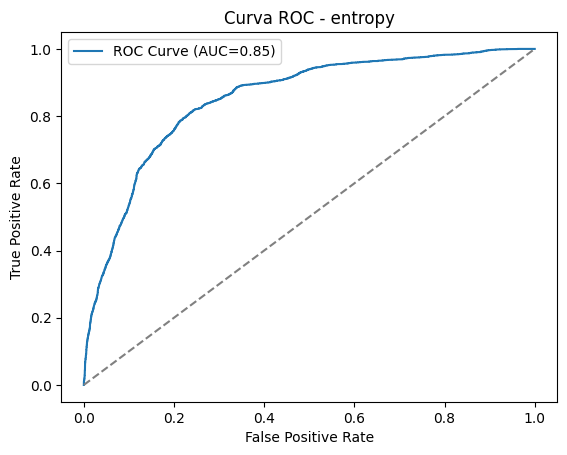

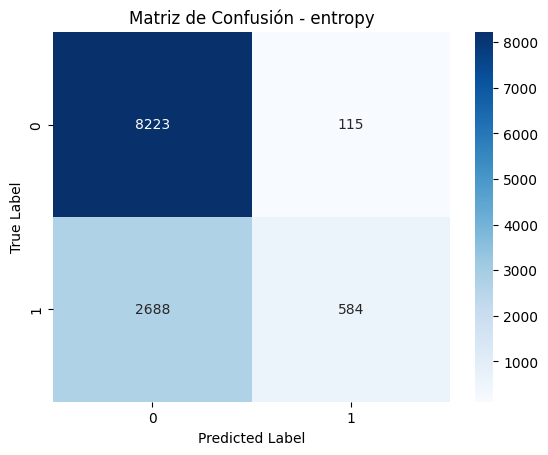


--------------------------------------------------
Modelo Optimizado 4
--------------------------------------------------
n_estimators: 500, max_depth: 5, min_samples_split: 5, min_samples_leaf: 2, max_features: sqrt

Classification Report for entropy - sqrt:
              precision    recall  f1-score   support

       False       0.75      0.99      0.85      8338
        True       0.84      0.18      0.29      3272

    accuracy                           0.76     11610
   macro avg       0.79      0.58      0.57     11610
weighted avg       0.78      0.76      0.70     11610


ROC-AUC Score: 0.8510147703594055



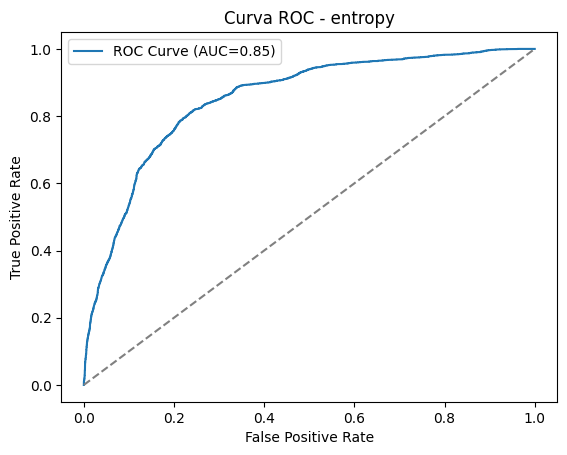

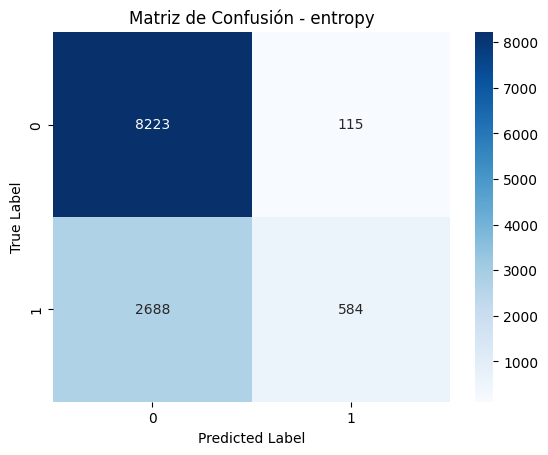


--------------------------------------------------
Modelo Optimizado 1
--------------------------------------------------
n_estimators: 500, max_depth: 5, min_samples_split: 2, min_samples_leaf: 1, max_features: sqrt

Classification Report for entropy - sqrt:
              precision    recall  f1-score   support

       False       0.75      0.99      0.85      8338
        True       0.84      0.18      0.29      3272

    accuracy                           0.76     11610
   macro avg       0.79      0.58      0.57     11610
weighted avg       0.78      0.76      0.70     11610


ROC-AUC Score: 0.8510147703594055



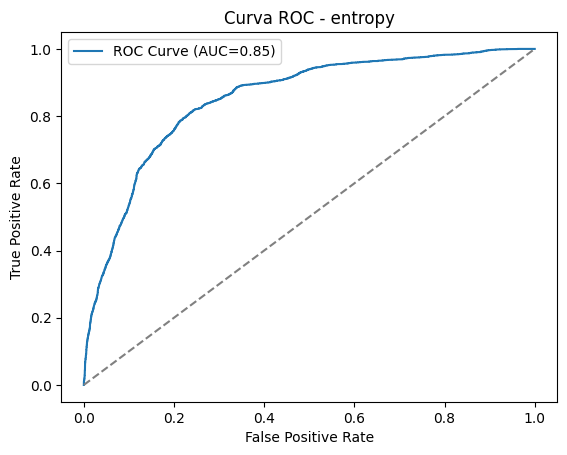

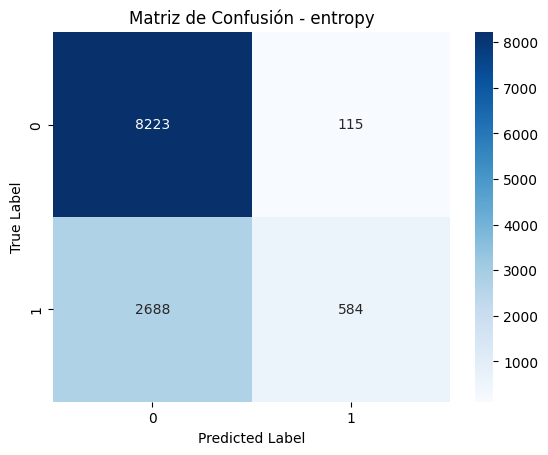

,n_estimators,max_depth,min_samples_split,min_samples_leaf,criterion,max_features,accuracy,f1_score,recall,roc_auc,cv_score,train_score,overfitting
2,500,5,5,1,entropy,sqrt,0.801292,0.771833,0.801292,0.880416,0.791468,0.794591,OK
3,500,5,5,2,entropy,sqrt,0.801206,0.771710,0.801206,0.880288,0.791533,0.794612,OK
0,500,5,2,1,entropy,sqrt,0.800775,0.771091,0.800775,0.880332,0.791382,0.794526,OK


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# Definir los hiperparámetros a iterar
param_grid_rf = {
    'n_estimators': [500],  # Número de árboles
    'max_depth': [5],  # Profundidad máxima
    'min_samples_split': [2, 5],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2],  # Número mínimo de muestras en una hoja
    'criterion': ['entropy'],  # Función para medir la calidad de la división
    'max_features': ['sqrt'],  # Número de características consideradas en cada división
    'bootstrap': [True],  # Si se usa muestreo con reemplazo
    'class_weight': [None],  # Ponderación de clases
    'min_weight_fraction_leaf': [0.0],  # Fracción mínima del peso de muestras requeridas en una hoja
    'max_leaf_nodes': [None],  # Número máximo de nodos hoja
    'warm_start': [False]  # Reutilizar árboles previos para acelerar entrenamiento
}

# Almacenar resultados
results_rf = []

# Iterar sobre todas las combinaciones de hiperparámetros
for params in product(*param_grid_rf.values()):
    n_estimators, max_depth, min_samples_split, min_samples_leaf, criterion, max_features, bootstrap, class_weight, min_weight_fraction_leaf, max_leaf_nodes, warm_start = params

    # Construir el modelo Random Forest con los hiperparámetros actuales
    model_rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        max_features=max_features,
        bootstrap=bootstrap,
        class_weight=class_weight,
        min_weight_fraction_leaf=min_weight_fraction_leaf,
        max_leaf_nodes=max_leaf_nodes,
        warm_start=warm_start,
        random_state=42
    )

    # Entrenar el modelo
    model_rf.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model_rf.predict(X_test)

    # Calcular métricas
    precision = precision_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Calcular ROC-AUC si hay más de una clase
    if len(np.unique(y_test)) > 1:
        y_pred_proba = model_rf.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None

    # Validación cruzada
    cv_scores = cross_val_score(model_rf, X_train, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)

    # Calcular Train Score
    train_score = model_rf.score(X_train, y_train)

    # Determinar si hay sobreajuste
    if train_score > 1.5 * mean_cv_score:
        overfitting_warning = "SEVERE OVERFITTING"
    elif train_score > 1.2 * mean_cv_score:
        overfitting_warning = "DANGER"
    elif train_score > 1.1 * mean_cv_score:
        overfitting_warning = "MILD OVERFITTING"
    else:
        overfitting_warning = "OK"

    # Guardar los resultados
    results_rf.append({
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'criterion': criterion,
        'max_features': max_features,
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'roc_auc': roc_auc,
        'cv_score': mean_cv_score,
        'train_score': train_score,
        'overfitting': overfitting_warning
    })

    # Imprimir resultados parciales
    print(f"n_estimators: {n_estimators}, max_depth: {max_depth}, min_samples_split: {min_samples_split}, min_samples_leaf: {min_samples_leaf}, max_features: {max_features}")
    print(f"Precision: {precision}, Accuracy: {accuracy}, F1 Score: {f1}, Recall: {recall}, ROC-AUC: {roc_auc}, CV Score: {mean_cv_score}, Train Score: {train_score}, Overfitting: {overfitting_warning}")

# Convertir resultados a DataFrame y seleccionar los 3 mejores modelos
results_rf_df = pd.DataFrame(results_rf)
results_rf_df = results_rf_df.sort_values(by=['f1_score'], ascending=False)

# Seleccionar el mejor modelo sin sobreajuste y optimizando F1 Score
best_models_rf = results_rf_df[results_rf_df['overfitting'] == 'OK'].head(3)

# Imprimir los mejores modelos
for index, row in best_models_rf.iterrows():
    print('\n' + '-' * 50)
    print(f'Modelo Optimizado {index + 1}')
    print('-' * 50)
    print(f'n_estimators: {row["n_estimators"]}, max_depth: {row["max_depth"]}, min_samples_split: {row["min_samples_split"]}, min_samples_leaf: {row["min_samples_leaf"]}, max_features: {row["max_features"]}')
    print(f'\nClassification Report for {row["criterion"]} - {row["max_features"]}:')
    y_pred = model_rf.predict(X_test)
    print(classification_report(y_test, y_pred))

    if len(np.unique(y_test)) > 1:
        y_pred_proba = model_rf.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f'\nROC-AUC Score: {roc_auc}\n')

        # Curva ROC
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Curva ROC - {row["criterion"]}')
        plt.legend()
        plt.show()

        # Matriz de confusión
        plt.figure()
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Matriz de Confusión - {row["criterion"]}')
        plt.show()

# Mostrar los mejores modelos
from IPython.display import display
display(best_models_rf)

f1 millorar

falta precision en tabla

printea las tblas que no son


n_estimators: 500, max_depth: 7, min_samples_split: 2, min_samples_leaf: 1, max_features: sqrt
Precision: 0.8287553248970286, Accuracy: 0.7888027562446167, F1 Score: 0.797680041790383, Recall: 0.7888027562446167, ROC-AUC: 0.896303106934933, CV Score: 0.7913176309822283, Train Score: 0.7947199552100606, Overfitting: OK
n_estimators: 500, max_depth: 7, min_samples_split: 2, min_samples_leaf: 1, max_features: sqrt
Precision: 0.8394306143071356, Accuracy: 0.7566752799310938, F1 Score: 0.768852338202625, Recall: 0.7566752799310938, ROC-AUC: 0.8942228110204495, CV Score: 0.7638406450553212, Train Score: 0.7667047094037339, Overfitting: OK
n_estimators: 500, max_depth: 7, min_samples_split: 2, min_samples_leaf: 2, max_features: sqrt
Precision: 0.828735175819453, Accuracy: 0.788458225667528, F1 Score: 0.7973776297966724, Recall: 0.788458225667528, ROC-AUC: 0.8964286295518031, CV Score: 0.791705239474627, Train Score: 0.7943108163397145, Overfitting: OK
n_estimators: 500, max_depth: 7, min_samp

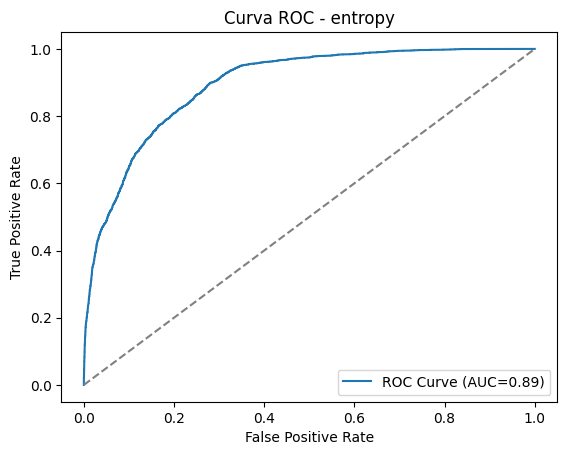

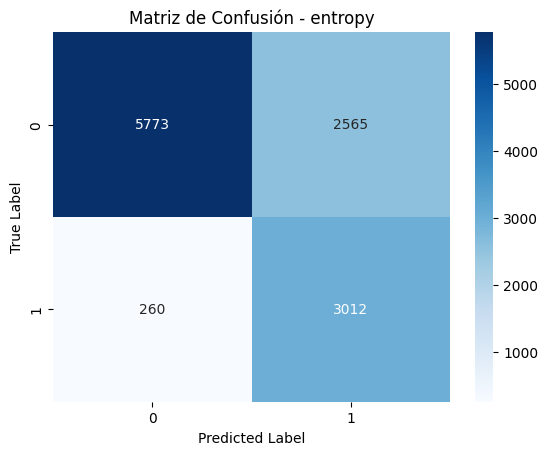


--------------------------------------------------
Modelo Optimizado 3
--------------------------------------------------
n_estimators: 500, max_depth: 7, min_samples_split: 2, min_samples_leaf: 2, max_features: sqrt

Classification Report for entropy - sqrt:
              precision    recall  f1-score   support

       False       0.96      0.69      0.80      8338
        True       0.54      0.92      0.68      3272

    accuracy                           0.76     11610
   macro avg       0.75      0.81      0.74     11610
weighted avg       0.84      0.76      0.77     11610


ROC-AUC Score: 0.8945256487662752



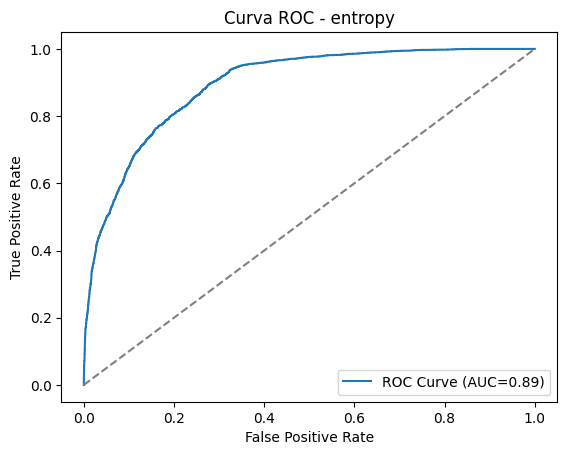

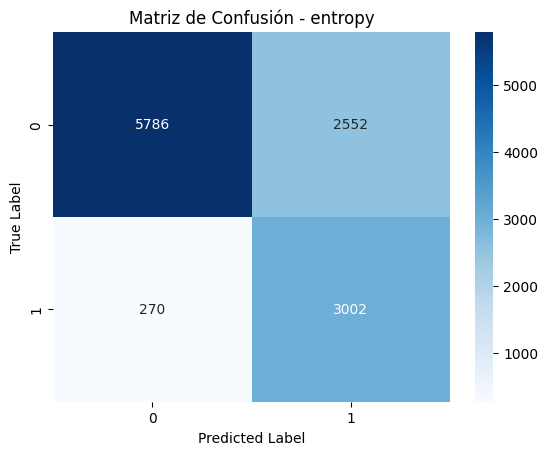


--------------------------------------------------
Modelo Optimizado 5
--------------------------------------------------
n_estimators: 500, max_depth: 7, min_samples_split: 5, min_samples_leaf: 1, max_features: sqrt

Classification Report for entropy - sqrt:
              precision    recall  f1-score   support

       False       0.96      0.69      0.80      8338
        True       0.54      0.92      0.68      3272

    accuracy                           0.76     11610
   macro avg       0.75      0.81      0.74     11610
weighted avg       0.84      0.76      0.77     11610


ROC-AUC Score: 0.8949070733103397



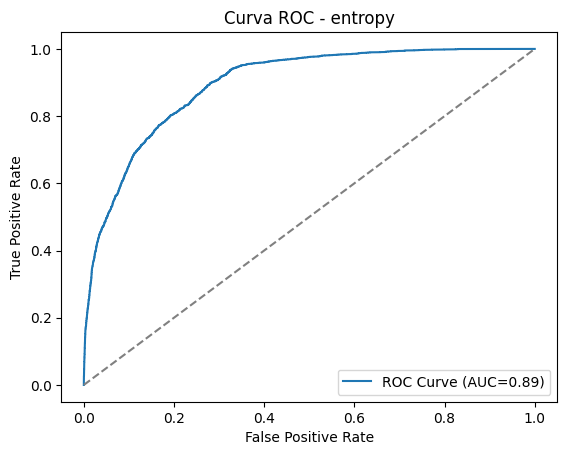

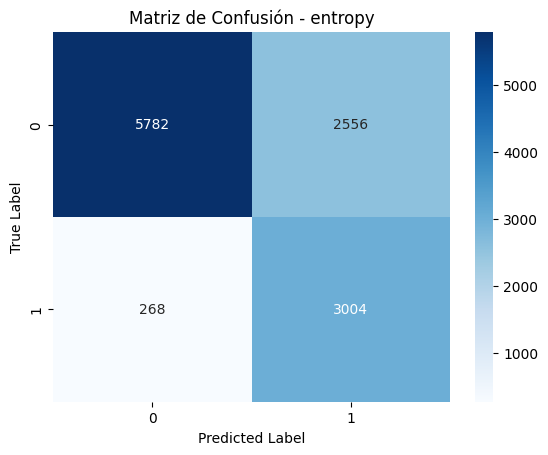

,model_id,n_estimators,max_depth,min_samples_split,min_samples_leaf,criterion,max_features,accuracy,f1_score,recall,roc_auc,cv_score,train_score,overfitting
0,500_7_2_1_entropy_sqrt,500,7,2,1,entropy,sqrt,0.788803,0.797680,0.788803,0.896303,0.791318,0.794720,OK
2,500_7_2_2_entropy_sqrt,500,7,2,2,entropy,sqrt,0.788458,0.797378,0.788458,0.896429,0.791705,0.794311,OK
4,500_7_5_1_entropy_sqrt,500,7,5,1,entropy,sqrt,0.788028,0.796934,0.788028,0.896730,0.791382,0.794591,OK


In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# Definir los hiperparámetros a iterar
param_grid_rf = {
    'n_estimators': [500],  # Número de árboles
    'max_depth': [7],  # Profundidad máxima
    'min_samples_split': [2, 5],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2],  # Número mínimo de muestras en una hoja
    'criterion': ['entropy'],  # Función para medir la calidad de la división
    'max_features': ['sqrt'],  # Número de características consideradas en cada división
    'bootstrap': [True],  # Si se usa muestreo con reemplazo
    'class_weight': ['balanced', {0: 1, 1: 4}],  # Ponderación de clases
    'min_weight_fraction_leaf': [0.0],  # Fracción mínima del peso de muestras requeridas en una hoja
    'max_leaf_nodes': [None],  # Número máximo de nodos hoja
    'warm_start': [False]  # Reutilizar árboles previos para acelerar entrenamiento
}

# Almacenar resultados y modelos
results_rf = []
models_dict = {}

# Iterar sobre todas las combinaciones de hiperparámetros
for params in product(*param_grid_rf.values()):
    n_estimators, max_depth, min_samples_split, min_samples_leaf, criterion, max_features, bootstrap, class_weight, min_weight_fraction_leaf, max_leaf_nodes, warm_start = params

    # Construir el modelo Random Forest con los hiperparámetros actuales
    model_rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        max_features=max_features,
        bootstrap=bootstrap,
        class_weight=class_weight,
        min_weight_fraction_leaf=min_weight_fraction_leaf,
        max_leaf_nodes=max_leaf_nodes,
        warm_start=warm_start,
        random_state=42
    )

    # Entrenar el modelo
    model_rf.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model_rf.predict(X_test)

    # Calcular métricas (usando micro para comparar con las finales)
    precision = precision_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # Calcular ROC-AUC si hay más de una clase
    if len(np.unique(y_test)) > 1:
        y_pred_proba = model_rf.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None

    # Validación cruzada
    cv_scores = cross_val_score(model_rf, X_train, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)

    # Calcular Train Score
    train_score = model_rf.score(X_train, y_train)

    # Determinar si hay sobreajuste
    if train_score > 1.5 * mean_cv_score:
        overfitting_warning = "SEVERE OVERFITTING"
    elif train_score > 1.2 * mean_cv_score:
        overfitting_warning = "DANGER"
    elif train_score > 1.1 * mean_cv_score:
        overfitting_warning = "MILD OVERFITTING"
    else:
        overfitting_warning = "OK"

    # Generar un ID único para el modelo
    model_id = f"{n_estimators}_{max_depth}_{min_samples_split}_{min_samples_leaf}_{criterion}_{max_features}"
    
    # Guardar el modelo en el diccionario
    models_dict[model_id] = model_rf

    # Guardar los resultados
    results_rf.append({
        'model_id': model_id,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'criterion': criterion,
        'max_features': max_features,
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'roc_auc': roc_auc,
        'cv_score': mean_cv_score,
        'train_score': train_score,
        'overfitting': overfitting_warning
    })

    # Imprimir resultados parciales
    print(f"n_estimators: {n_estimators}, max_depth: {max_depth}, min_samples_split: {min_samples_split}, min_samples_leaf: {min_samples_leaf}, max_features: {max_features}")
    print(f"Precision: {precision}, Accuracy: {accuracy}, F1 Score: {f1}, Recall: {recall}, ROC-AUC: {roc_auc}, CV Score: {mean_cv_score}, Train Score: {train_score}, Overfitting: {overfitting_warning}")

# Convertir resultados a DataFrame y seleccionar los 3 mejores modelos
results_rf_df = pd.DataFrame(results_rf)
results_rf_df = results_rf_df.sort_values(by=['f1_score'], ascending=False)

# Seleccionar el mejor modelo sin sobreajuste y optimizando F1 Score
best_models_rf = results_rf_df[results_rf_df['overfitting'] == 'OK'].head(3)

# Imprimir los mejores modelos usando los modelos guardados
for index, row in best_models_rf.iterrows():
    print('\n' + '-' * 50)
    print(f'Modelo Optimizado {index + 1}')
    print('-' * 50)
    print(f'n_estimators: {row["n_estimators"]}, max_depth: {row["max_depth"]}, min_samples_split: {row["min_samples_split"]}, min_samples_leaf: {row["min_samples_leaf"]}, max_features: {row["max_features"]}')
    
    # Recuperar el modelo correspondiente
    model_id = row['model_id']
    current_model = models_dict[model_id]
    
    # Calcular predicciones con este modelo específico
    y_pred = current_model.predict(X_test)
    
    # Mostrar el classification report para este modelo
    print(f'\nClassification Report for {row["criterion"]} - {row["max_features"]}:')
    print(classification_report(y_test, y_pred))

    if len(np.unique(y_test)) > 1:
        y_pred_proba = current_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f'\nROC-AUC Score: {roc_auc}\n')

        # Curva ROC
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Curva ROC - {row["criterion"]}')
        plt.legend()
        plt.show()

        # Matriz de confusión
        plt.figure()
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Matriz de Confusión - {row["criterion"]}')
        plt.show()

# Mostrar los mejores modelos
from IPython.display import display
display(best_models_rf)

n_estimators: 500, max_depth: 7, min_samples_split: 2, min_samples_leaf: 1, max_features: sqrt
Precision: 0.8287553248970286, Accuracy: 0.7888027562446167, F1 Score: 0.797680041790383, Recall: 0.7888027562446167, ROC-AUC: 0.896303106934933, CV Score: 0.7913176309822283, Train Score: 0.7947199552100606, Overfitting: OK
n_estimators: 500, max_depth: 7, min_samples_split: 2, min_samples_leaf: 1, max_features: sqrt
Precision: 0.8290722090379409, Accuracy: 0.8339362618432385, F1 Score: 0.8248215513376193, Recall: 0.8339362618432385, ROC-AUC: 0.8991894123642838, CV Score: 0.8253623075498366, Train Score: 0.8344710265078921, Overfitting: OK
n_estimators: 500, max_depth: 7, min_samples_split: 2, min_samples_leaf: 2, max_features: sqrt
Precision: 0.828735175819453, Accuracy: 0.788458225667528, F1 Score: 0.7973776297966724, Recall: 0.788458225667528, ROC-AUC: 0.8964286295518031, CV Score: 0.791705239474627, Train Score: 0.7943108163397145, Overfitting: OK
n_estimators: 500, max_depth: 7, min_sam

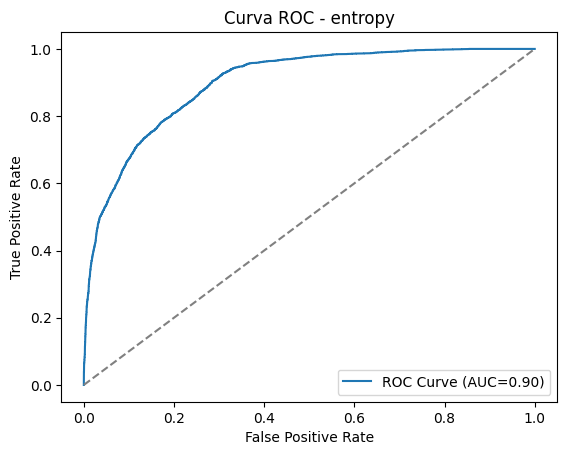

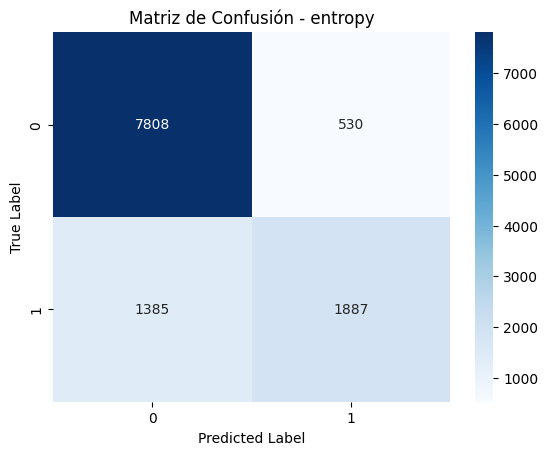


--------------------------------------------------
Modelo Optimizado 8
--------------------------------------------------
n_estimators: 500, max_depth: 7, min_samples_split: 5, min_samples_leaf: 2, max_features: sqrt

Classification Report for entropy - sqrt:
              precision    recall  f1-score   support

       False       0.85      0.93      0.89      8338
        True       0.77      0.59      0.67      3272

    accuracy                           0.83     11610
   macro avg       0.81      0.76      0.78     11610
weighted avg       0.83      0.83      0.83     11610


ROC-AUC Score: 0.8991662651800076



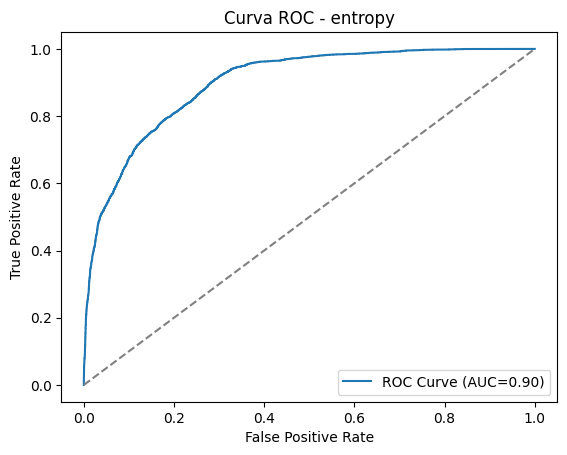

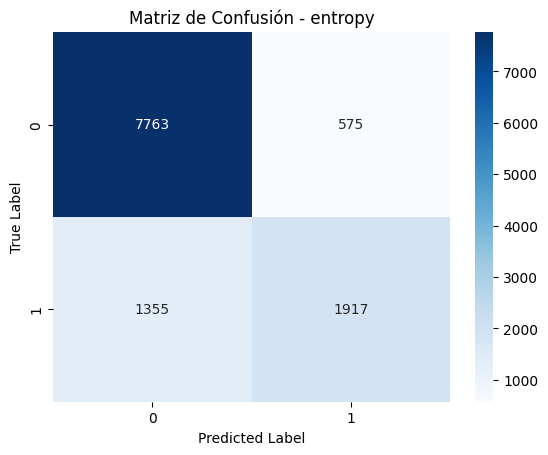


--------------------------------------------------
Modelo Optimizado 4
--------------------------------------------------
n_estimators: 500, max_depth: 7, min_samples_split: 2, min_samples_leaf: 2, max_features: sqrt

Classification Report for entropy - sqrt:
              precision    recall  f1-score   support

       False       0.85      0.94      0.89      8338
        True       0.78      0.58      0.66      3272

    accuracy                           0.83     11610
   macro avg       0.81      0.76      0.78     11610
weighted avg       0.83      0.83      0.83     11610


ROC-AUC Score: 0.8992515230590673



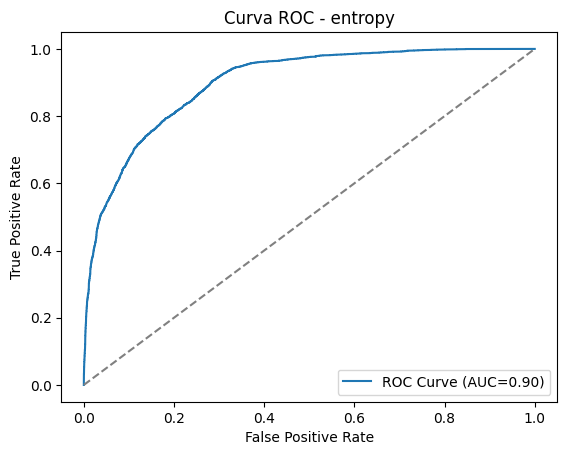

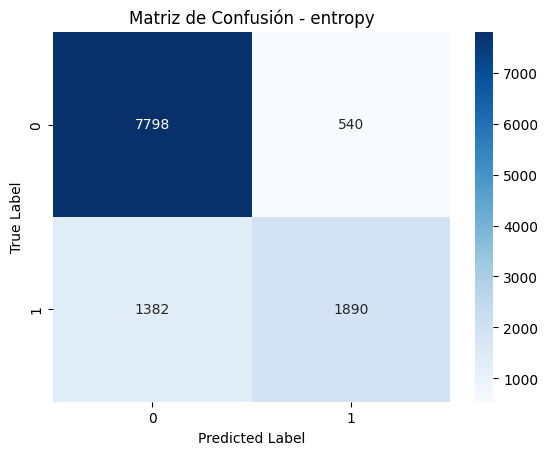

,model_id,n_estimators,max_depth,min_samples_split,min_samples_leaf,criterion,max_features,accuracy,f1_score,recall,roc_auc,cv_score,train_score,overfitting
5,500_7_5_1_entropy_sqrt,500,7,5,1,entropy,sqrt,0.835056,0.826683,0.835056,0.899298,0.826073,0.836172,OK
7,500_7_5_2_entropy_sqrt,500,7,5,2,entropy,sqrt,0.833764,0.826230,0.833764,0.899166,0.825750,0.835483,OK
3,500_7_2_2_entropy_sqrt,500,7,2,2,entropy,sqrt,0.834453,0.826209,0.834453,0.899252,0.825513,0.835742,OK


In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# Definir los hiperparámetros a iterar
param_grid_rf = {
    'n_estimators': [500],  # Número de árboles
    'max_depth': [7],  # Profundidad máxima
    'min_samples_split': [2, 5],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2],  # Número mínimo de muestras en una hoja
    'criterion': ['entropy'],  # Función para medir la calidad de la división
    'max_features': ['sqrt'],  # Número de características consideradas en cada división
    'bootstrap': [True],  # Si se usa muestreo con reemplazo
    'class_weight': ['balanced', {0: 1}],  # Ponderación de clases
    'min_weight_fraction_leaf': [0.0],  # Fracción mínima del peso de muestras requeridas en una hoja
    'max_leaf_nodes': [None],  # Número máximo de nodos hoja
    'warm_start': [False]  # Reutilizar árboles previos para acelerar entrenamiento
}

# Almacenar resultados y modelos
results_rf = []
models_dict = {}

# Iterar sobre todas las combinaciones de hiperparámetros
for params in product(*param_grid_rf.values()):
    n_estimators, max_depth, min_samples_split, min_samples_leaf, criterion, max_features, bootstrap, class_weight, min_weight_fraction_leaf, max_leaf_nodes, warm_start = params

    # Construir el modelo Random Forest con los hiperparámetros actuales
    model_rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        max_features=max_features,
        bootstrap=bootstrap,
        class_weight=class_weight,
        min_weight_fraction_leaf=min_weight_fraction_leaf,
        max_leaf_nodes=max_leaf_nodes,
        warm_start=warm_start,
        random_state=42
    )

    # Entrenar el modelo
    model_rf.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model_rf.predict(X_test)

    # Calcular métricas (usando micro para comparar con las finales)
    precision = precision_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # Calcular ROC-AUC si hay más de una clase
    if len(np.unique(y_test)) > 1:
        y_pred_proba = model_rf.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None

    # Validación cruzada
    cv_scores = cross_val_score(model_rf, X_train, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)

    # Calcular Train Score
    train_score = model_rf.score(X_train, y_train)

    # Determinar si hay sobreajuste
    if train_score > 1.5 * mean_cv_score:
        overfitting_warning = "SEVERE OVERFITTING"
    elif train_score > 1.2 * mean_cv_score:
        overfitting_warning = "DANGER"
    elif train_score > 1.1 * mean_cv_score:
        overfitting_warning = "MILD OVERFITTING"
    else:
        overfitting_warning = "OK"

    # Generar un ID único para el modelo
    model_id = f"{n_estimators}_{max_depth}_{min_samples_split}_{min_samples_leaf}_{criterion}_{max_features}"
    
    # Guardar el modelo en el diccionario
    models_dict[model_id] = model_rf

    # Guardar los resultados
    results_rf.append({
        'model_id': model_id,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'criterion': criterion,
        'max_features': max_features,
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'roc_auc': roc_auc,
        'cv_score': mean_cv_score,
        'train_score': train_score,
        'overfitting': overfitting_warning
    })

    # Imprimir resultados parciales
    print(f"n_estimators: {n_estimators}, max_depth: {max_depth}, min_samples_split: {min_samples_split}, min_samples_leaf: {min_samples_leaf}, max_features: {max_features}")
    print(f"Precision: {precision}, Accuracy: {accuracy}, F1 Score: {f1}, Recall: {recall}, ROC-AUC: {roc_auc}, CV Score: {mean_cv_score}, Train Score: {train_score}, Overfitting: {overfitting_warning}")

# Convertir resultados a DataFrame y seleccionar los 3 mejores modelos
results_rf_df = pd.DataFrame(results_rf)
results_rf_df = results_rf_df.sort_values(by=['f1_score'], ascending=False)

# Seleccionar el mejor modelo sin sobreajuste y optimizando F1 Score
best_models_rf = results_rf_df[results_rf_df['overfitting'] == 'OK'].head(3)

# Imprimir los mejores modelos usando los modelos guardados
for index, row in best_models_rf.iterrows():
    print('\n' + '-' * 50)
    print(f'Modelo Optimizado {index + 1}')
    print('-' * 50)
    print(f'n_estimators: {row["n_estimators"]}, max_depth: {row["max_depth"]}, min_samples_split: {row["min_samples_split"]}, min_samples_leaf: {row["min_samples_leaf"]}, max_features: {row["max_features"]}')
    
    # Recuperar el modelo correspondiente
    model_id = row['model_id']
    current_model = models_dict[model_id]
    
    # Calcular predicciones con este modelo específico
    y_pred = current_model.predict(X_test)
    
    # Mostrar el classification report para este modelo
    print(f'\nClassification Report for {row["criterion"]} - {row["max_features"]}:')
    print(classification_report(y_test, y_pred))

    if len(np.unique(y_test)) > 1:
        y_pred_proba = current_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f'\nROC-AUC Score: {roc_auc}\n')

        # Curva ROC
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Curva ROC - {row["criterion"]}')
        plt.legend()
        plt.show()

        # Matriz de confusión
        plt.figure()
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Matriz de Confusión - {row["criterion"]}')
        plt.show()

# Mostrar los mejores modelos
from IPython.display import display
display(best_models_rf)

n_estimators: 500, max_depth: 7, min_samples_split: 2, min_samples_leaf: 1, max_features: sqrt
Precision: 0.8287553248970286, Accuracy: 0.7888027562446167, F1 Score: 0.797680041790383, Recall: 0.7888027562446167, ROC-AUC: 0.896303106934933, CV Score: 0.7913176309822283, Train Score: 0.7947199552100606, Overfitting: OK
n_estimators: 500, max_depth: 7, min_samples_split: 2, min_samples_leaf: 1, max_features: sqrt
Precision: 0.8394306143071356, Accuracy: 0.7566752799310938, F1 Score: 0.768852338202625, Recall: 0.7566752799310938, ROC-AUC: 0.8942228110204495, CV Score: 0.7638406450553212, Train Score: 0.7667047094037339, Overfitting: OK
n_estimators: 500, max_depth: 7, min_samples_split: 2, min_samples_leaf: 2, max_features: sqrt
Precision: 0.828735175819453, Accuracy: 0.788458225667528, F1 Score: 0.7973776297966724, Recall: 0.788458225667528, ROC-AUC: 0.8964286295518031, CV Score: 0.791705239474627, Train Score: 0.7943108163397145, Overfitting: OK
n_estimators: 500, max_depth: 7, min_samp

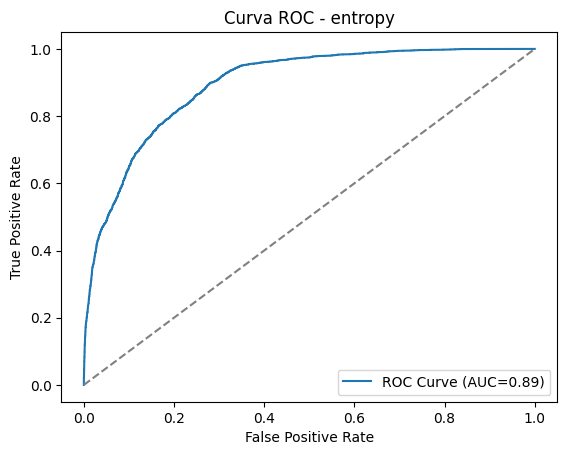

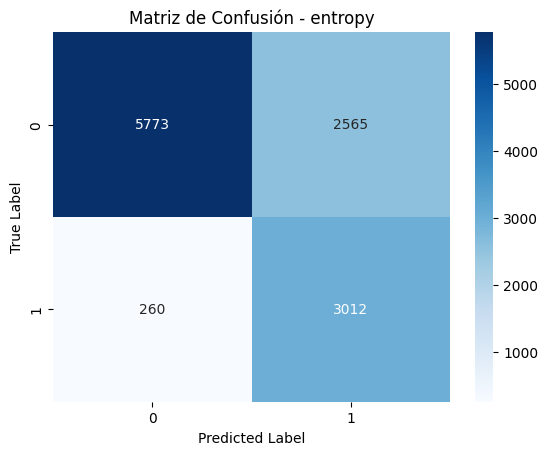


--------------------------------------------------
Modelo Optimizado 3
--------------------------------------------------
n_estimators: 500, max_depth: 7, min_samples_split: 2, min_samples_leaf: 2, max_features: sqrt

Classification Report for entropy - sqrt:
              precision    recall  f1-score   support

       False       0.96      0.69      0.80      8338
        True       0.54      0.92      0.68      3272

    accuracy                           0.76     11610
   macro avg       0.75      0.81      0.74     11610
weighted avg       0.84      0.76      0.77     11610


ROC-AUC Score: 0.8945256487662752



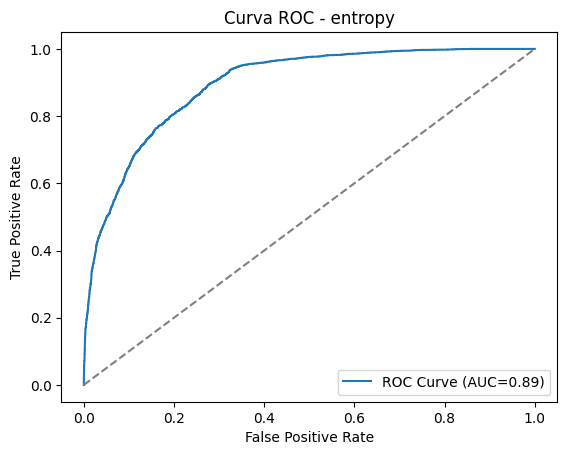

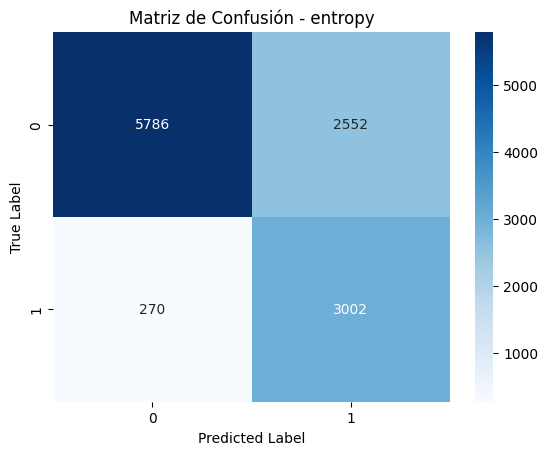


--------------------------------------------------
Modelo Optimizado 5
--------------------------------------------------
n_estimators: 500, max_depth: 7, min_samples_split: 5, min_samples_leaf: 1, max_features: sqrt

Classification Report for entropy - sqrt:
              precision    recall  f1-score   support

       False       0.96      0.69      0.80      8338
        True       0.54      0.92      0.68      3272

    accuracy                           0.76     11610
   macro avg       0.75      0.81      0.74     11610
weighted avg       0.84      0.76      0.77     11610


ROC-AUC Score: 0.8949070733103397



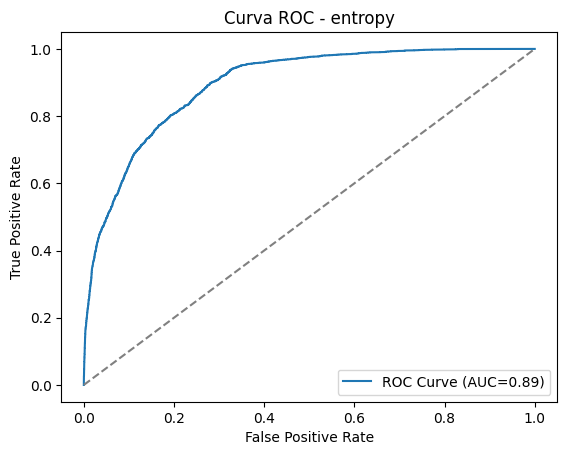

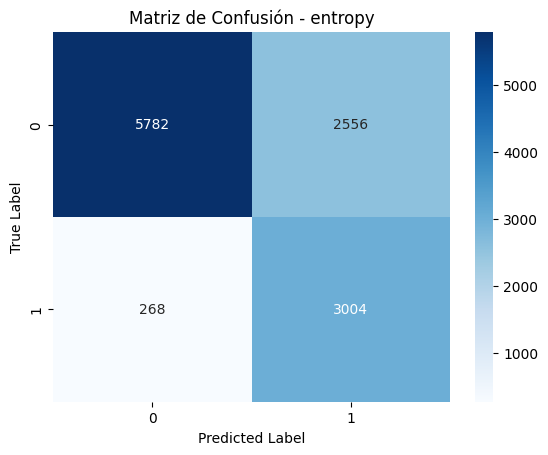

,model_id,n_estimators,max_depth,min_samples_split,min_samples_leaf,criterion,max_features,accuracy,f1_score,recall,roc_auc,cv_score,train_score,overfitting
0,500_7_2_1_entropy_sqrt,500,7,2,1,entropy,sqrt,0.788803,0.797680,0.788803,0.896303,0.791318,0.794720,OK
2,500_7_2_2_entropy_sqrt,500,7,2,2,entropy,sqrt,0.788458,0.797378,0.788458,0.896429,0.791705,0.794311,OK
4,500_7_5_1_entropy_sqrt,500,7,5,1,entropy,sqrt,0.788028,0.796934,0.788028,0.896730,0.791382,0.794591,OK


In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# Definir los hiperparámetros a iterar
param_grid_rf = {
    'n_estimators': [500],  # Número de árboles
    'max_depth': [7],  # Profundidad máxima
    'min_samples_split': [2, 5],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2],  # Número mínimo de muestras en una hoja
    'criterion': ['entropy'],  # Función para medir la calidad de la división
    'max_features': ['sqrt'],  # Número de características consideradas en cada división
    'bootstrap': [True],  # Si se usa muestreo con reemplazo
    'class_weight': ['balanced', {1: 4}],  # Ponderación de clases
    'min_weight_fraction_leaf': [0.0],  # Fracción mínima del peso de muestras requeridas en una hoja
    'max_leaf_nodes': [None],  # Número máximo de nodos hoja
    'warm_start': [False]  # Reutilizar árboles previos para acelerar entrenamiento
}

# Almacenar resultados y modelos
results_rf = []
models_dict = {}

# Iterar sobre todas las combinaciones de hiperparámetros
for params in product(*param_grid_rf.values()):
    n_estimators, max_depth, min_samples_split, min_samples_leaf, criterion, max_features, bootstrap, class_weight, min_weight_fraction_leaf, max_leaf_nodes, warm_start = params

    # Construir el modelo Random Forest con los hiperparámetros actuales
    model_rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        max_features=max_features,
        bootstrap=bootstrap,
        class_weight=class_weight,
        min_weight_fraction_leaf=min_weight_fraction_leaf,
        max_leaf_nodes=max_leaf_nodes,
        warm_start=warm_start,
        random_state=42
    )

    # Entrenar el modelo
    model_rf.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model_rf.predict(X_test)

    # Calcular métricas (usando micro para comparar con las finales)
    precision = precision_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # Calcular ROC-AUC si hay más de una clase
    if len(np.unique(y_test)) > 1:
        y_pred_proba = model_rf.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None

    # Validación cruzada
    cv_scores = cross_val_score(model_rf, X_train, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)

    # Calcular Train Score
    train_score = model_rf.score(X_train, y_train)

    # Determinar si hay sobreajuste
    if train_score > 1.5 * mean_cv_score:
        overfitting_warning = "SEVERE OVERFITTING"
    elif train_score > 1.2 * mean_cv_score:
        overfitting_warning = "DANGER"
    elif train_score > 1.1 * mean_cv_score:
        overfitting_warning = "MILD OVERFITTING"
    else:
        overfitting_warning = "OK"

    # Generar un ID único para el modelo
    model_id = f"{n_estimators}_{max_depth}_{min_samples_split}_{min_samples_leaf}_{criterion}_{max_features}"
    
    # Guardar el modelo en el diccionario
    models_dict[model_id] = model_rf

    # Guardar los resultados
    results_rf.append({
        'model_id': model_id,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'criterion': criterion,
        'max_features': max_features,
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'roc_auc': roc_auc,
        'cv_score': mean_cv_score,
        'train_score': train_score,
        'overfitting': overfitting_warning
    })

    # Imprimir resultados parciales
    print(f"n_estimators: {n_estimators}, max_depth: {max_depth}, min_samples_split: {min_samples_split}, min_samples_leaf: {min_samples_leaf}, max_features: {max_features}")
    print(f"Precision: {precision}, Accuracy: {accuracy}, F1 Score: {f1}, Recall: {recall}, ROC-AUC: {roc_auc}, CV Score: {mean_cv_score}, Train Score: {train_score}, Overfitting: {overfitting_warning}")

# Convertir resultados a DataFrame y seleccionar los 3 mejores modelos
results_rf_df = pd.DataFrame(results_rf)
results_rf_df = results_rf_df.sort_values(by=['f1_score'], ascending=False)

# Seleccionar el mejor modelo sin sobreajuste y optimizando F1 Score
best_models_rf = results_rf_df[results_rf_df['overfitting'] == 'OK'].head(3)

# Imprimir los mejores modelos usando los modelos guardados
for index, row in best_models_rf.iterrows():
    print('\n' + '-' * 50)
    print(f'Modelo Optimizado {index + 1}')
    print('-' * 50)
    print(f'n_estimators: {row["n_estimators"]}, max_depth: {row["max_depth"]}, min_samples_split: {row["min_samples_split"]}, min_samples_leaf: {row["min_samples_leaf"]}, max_features: {row["max_features"]}')
    
    # Recuperar el modelo correspondiente
    model_id = row['model_id']
    current_model = models_dict[model_id]
    
    # Calcular predicciones con este modelo específico
    y_pred = current_model.predict(X_test)
    
    # Mostrar el classification report para este modelo
    print(f'\nClassification Report for {row["criterion"]} - {row["max_features"]}:')
    print(classification_report(y_test, y_pred))

    if len(np.unique(y_test)) > 1:
        y_pred_proba = current_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f'\nROC-AUC Score: {roc_auc}\n')

        # Curva ROC
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Curva ROC - {row["criterion"]}')
        plt.legend()
        plt.show()

        # Matriz de confusión
        plt.figure()
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Matriz de Confusión - {row["criterion"]}')
        plt.show()

# Mostrar los mejores modelos
from IPython.display import display
display(best_models_rf)

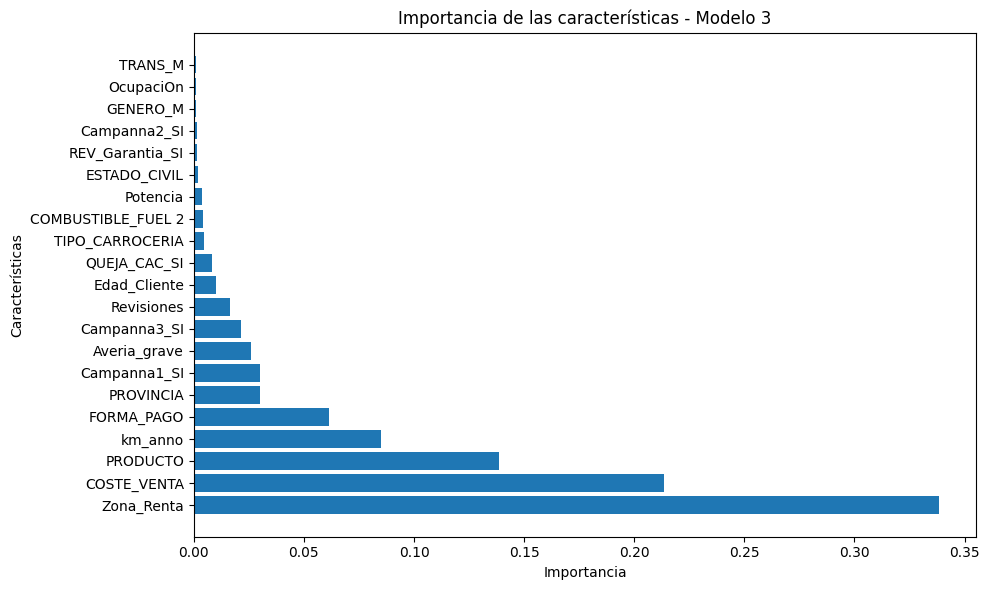

In [146]:
# Obtener y graficar las importancias de las características
importances = current_model.feature_importances_
features = X_train.columns  # Asegúrate de que X_train tenga las columnas correctas

indices = np.argsort(importances)[::-1]

# Crear la gráfica de barras horizontal (ahora las características estarán en el eje y)
plt.figure(figsize=(10, 6))
plt.barh(features[indices], importances[indices], align='center')  # Usar barh para gráfico horizontal
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title(f'Importancia de las características - Modelo {index + 1}')
plt.tight_layout()
plt.show()

# Boost

## 1. AdaBoost


Classification Report for SAMME - 0.1:
              precision    recall  f1-score   support

       False       0.81      0.93      0.86      8338
        True       0.71      0.43      0.53      3272

    accuracy                           0.79     11610
   macro avg       0.76      0.68      0.70     11610
weighted avg       0.78      0.79      0.77     11610


ROC-AUC Score: 0.8497588844134816



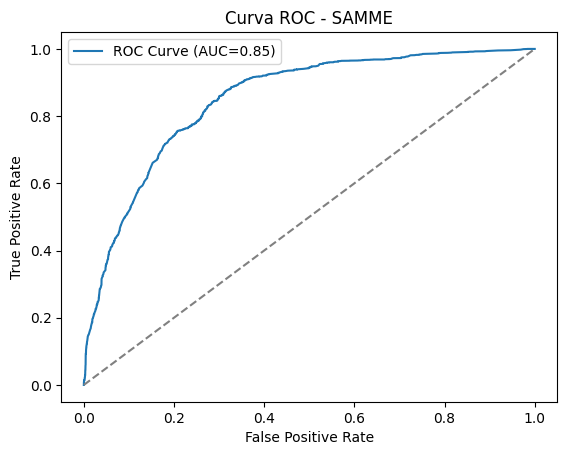


Classification Report for SAMME - 0.01:
              precision    recall  f1-score   support

       False       0.76      0.97      0.85      8338
        True       0.74      0.22      0.33      3272

    accuracy                           0.76     11610
   macro avg       0.75      0.59      0.59     11610
weighted avg       0.75      0.76      0.71     11610


ROC-AUC Score: 0.8216671646762899



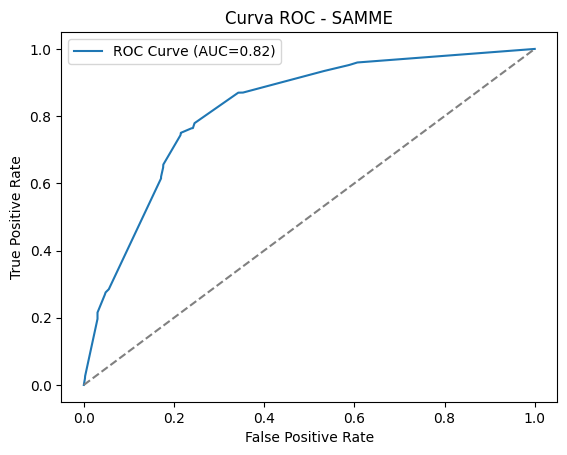

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# Definir los hiperparámetros a iterar
param_grid_ab = {
    'n_estimators': [500],  # Fijo en 500
    'learning_rate': [0.01, 0.1],  # Menos combinaciones
    'algorithm': ['SAMME'],  # Algoritmo más eficiente
}

# Almacenar resultados y modelos
results_ab = []
models_dict_ab = {}

# Iterar sobre todas las combinaciones de hiperparámetros
for params in product(*param_grid_ab.values()):
    n_estimators, learning_rate, algorithm = params

    # Construir el modelo AdaBoost con los hiperparámetros actuales
    model_ab = AdaBoostClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        algorithm=algorithm,
        random_state=42
    )

    # Entrenar el modelo
    model_ab.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model_ab.predict(X_test)

    # Calcular métricas
    precision = precision_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Calcular ROC-AUC si hay más de una clase
    if len(np.unique(y_test)) > 1:
        y_pred_proba = model_ab.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None

    # Validación cruzada
    cv_scores = cross_val_score(model_ab, X_train, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)

    # Calcular Train Score
    train_score = model_ab.score(X_train, y_train)

    # Determinar si hay sobreajuste
    if train_score > 1.5 * mean_cv_score:
        overfitting_warning = "SEVERE OVERFITTING"
    elif train_score > 1.2 * mean_cv_score:
        overfitting_warning = "DANGER"
    elif train_score > 1.1 * mean_cv_score:
        overfitting_warning = "MILD OVERFITTING"
    else:
        overfitting_warning = "OK"

    # Generar un ID único para el modelo
    model_id = f"{n_estimators}_{learning_rate}_{algorithm}"
    
    # Guardar el modelo en el diccionario
    models_dict_ab[model_id] = model_ab

    # Guardar los resultados
    results_ab.append({
        'model_id': model_id,
        'n_estimators': n_estimators,
        'learning_rate': learning_rate,
        'algorithm': algorithm,
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'roc_auc': roc_auc,
        'cv_score': mean_cv_score,
        'train_score': train_score,
        'overfitting': overfitting_warning
    })

    # Imprimir resultados parciales
    print(f"n_estimators: {n_estimators}, learning_rate: {learning_rate}, algorithm: {algorithm}")
    print(f"Precision: {precision}, Accuracy: {accuracy}, F1 Score: {f1}, Recall: {recall}, ROC-AUC: {roc_auc}, CV Score: {mean_cv_score}, Train Score: {train_score}, Overfitting: {overfitting_warning}")

# Convertir resultados a DataFrame y seleccionar los 3 mejores modelos
results_ab_df = pd.DataFrame(results_ab)
results_ab_df = results_ab_df.sort_values(by=['f1_score'], ascending=False)

# Seleccionar el mejor modelo sin sobreajuste y optimizando F1 Score
best_models_ab = results_ab_df[results_ab_df['overfitting'] == 'OK'].head(3)

# Imprimir los mejores modelos usando los modelos guardados
for index, row in best_models_ab.iterrows():
    model_id = row['model_id']
    current_model = models_dict_ab[model_id]
    y_pred = current_model.predict(X_test)
    
    print(f'\nClassification Report for {row["algorithm"]} - {row["learning_rate"]}:')
    print(classification_report(y_test, y_pred))
    if len(np.unique(y_test)) > 1:
        y_pred_proba = current_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f'\nROC-AUC Score: {roc_auc}\n')
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Curva ROC - {row["algorithm"]}')
        plt.legend()
        plt.show()
        
        # Matriz de confusión
        plt.figure()
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Matriz de Confusión - {row["criterion"]}')
        plt.show()  
        
# Mostrar los mejores modelos
from IPython.display import display
display(best_models_rf)

## 2. Gradient Boosting

n_estimators: 500, learning_rate: 0.01, loss: log_loss, min_samples_split: 2, min_samples_leaf: 1, max_depth: 7, subsample: 0.8
Precision: 0.8736396197209481, Accuracy: 0.8757967269595176, F1 Score: 0.8742073493764502, Recall: 0.8757967269595176, ROC-AUC: 0.9468067808677506, CV Score: 0.8651779988085927, Train Score: 0.8915351321087879, Overfitting: OK
Confusion Matrix for log_loss - 0.01 - 0.8:


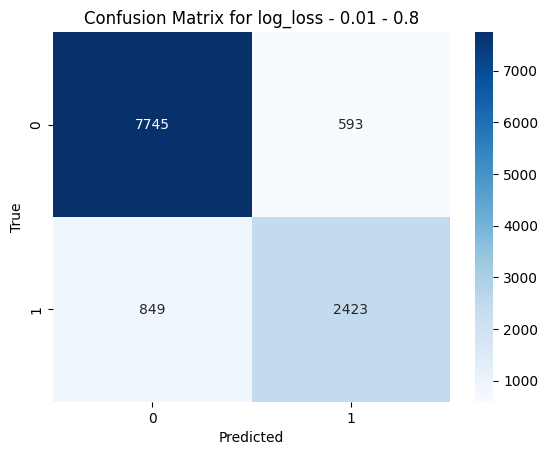

n_estimators: 500, learning_rate: 0.01, loss: log_loss, min_samples_split: 2, min_samples_leaf: 2, max_depth: 7, subsample: 0.8
Precision: 0.8739000019691009, Accuracy: 0.8760551248923342, F1 Score: 0.8744623998996147, Recall: 0.8760551248923342, ROC-AUC: 0.9467648483597352, CV Score: 0.8643597340507375, Train Score: 0.8910613923641767, Overfitting: OK
Confusion Matrix for log_loss - 0.01 - 0.8:


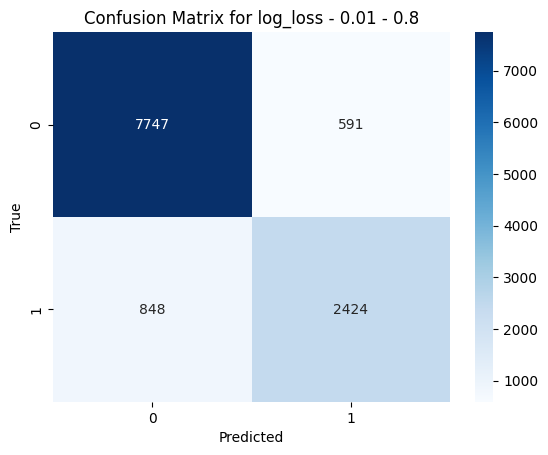

n_estimators: 500, learning_rate: 0.01, loss: log_loss, min_samples_split: 5, min_samples_leaf: 1, max_depth: 7, subsample: 0.8
Precision: 0.873775714212801, Accuracy: 0.8758828596037899, F1 Score: 0.8743543876207498, Recall: 0.8758828596037899, ROC-AUC: 0.9468108128396753, CV Score: 0.8649195985571415, Train Score: 0.8910398587394216, Overfitting: OK
Confusion Matrix for log_loss - 0.01 - 0.8:


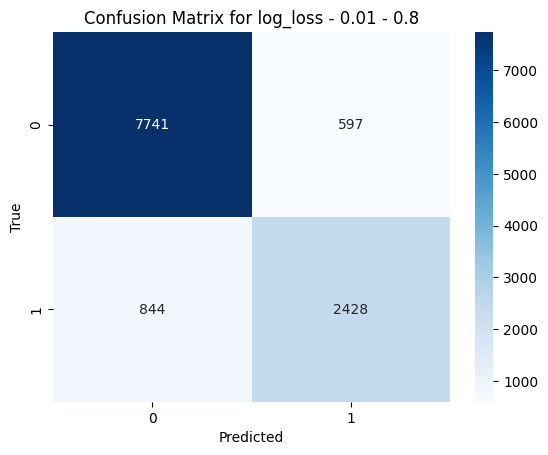

n_estimators: 500, learning_rate: 0.01, loss: log_loss, min_samples_split: 5, min_samples_leaf: 2, max_depth: 7, subsample: 0.8
Precision: 0.8739000019691009, Accuracy: 0.8760551248923342, F1 Score: 0.8744623998996147, Recall: 0.8760551248923342, ROC-AUC: 0.9469970532883003, CV Score: 0.8647688780228389, Train Score: 0.8914489976097677, Overfitting: OK
Confusion Matrix for log_loss - 0.01 - 0.8:


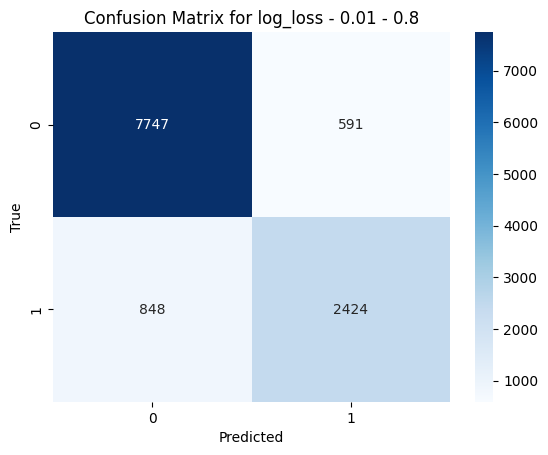

n_estimators: 500, learning_rate: 0.1, loss: log_loss, min_samples_split: 2, min_samples_leaf: 1, max_depth: 7, subsample: 0.8
Precision: 0.8842650053776688, Accuracy: 0.8852713178294573, F1 Score: 0.8846778315560961, Recall: 0.8852713178294573, ROC-AUC: 0.9561830949240553, CV Score: 0.8748249523497368, Train Score: 0.9846034583001356, Overfitting: MILD OVERFITTING
Confusion Matrix for log_loss - 0.1 - 0.8:


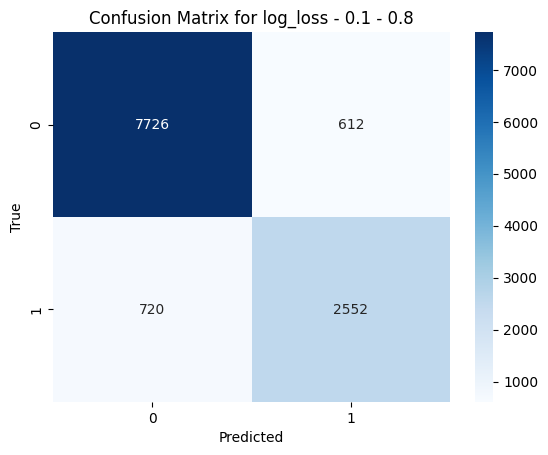

n_estimators: 500, learning_rate: 0.1, loss: log_loss, min_samples_split: 2, min_samples_leaf: 2, max_depth: 7, subsample: 0.8
Precision: 0.8849049770553756, Accuracy: 0.8854435831180018, F1 Score: 0.885151879037518, Recall: 0.8854435831180018, ROC-AUC: 0.9566402472317214, CV Score: 0.8751479915011835, Train Score: 0.9849479962962165, Overfitting: MILD OVERFITTING
Confusion Matrix for log_loss - 0.1 - 0.8:


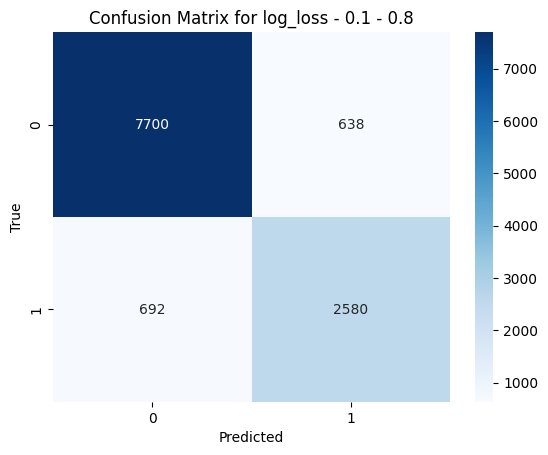

n_estimators: 500, learning_rate: 0.1, loss: log_loss, min_samples_split: 5, min_samples_leaf: 1, max_depth: 7, subsample: 0.8
Precision: 0.8829047941643876, Accuracy: 0.8838931955211025, F1 Score: 0.883315493707421, Recall: 0.8838931955211025, ROC-AUC: 0.9557478069005074, CV Score: 0.8749111452785131, Train Score: 0.9842158530545446, Overfitting: MILD OVERFITTING
Confusion Matrix for log_loss - 0.1 - 0.8:


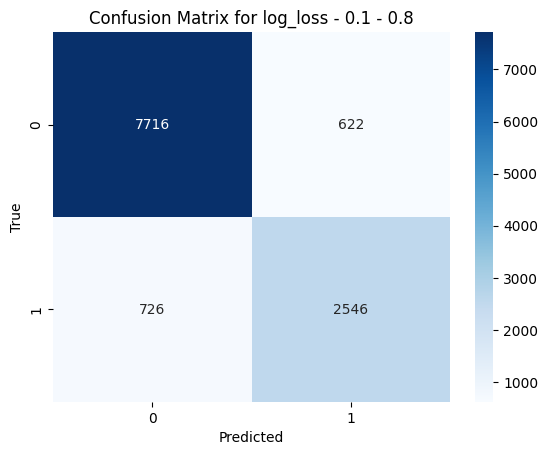

n_estimators: 500, learning_rate: 0.1, loss: log_loss, min_samples_split: 5, min_samples_leaf: 2, max_depth: 7, subsample: 0.8
Precision: 0.8843679761923885, Accuracy: 0.8851851851851852, F1 Score: 0.8847208375964903, Recall: 0.8851851851851852, ROC-AUC: 0.9563294555049171, CV Score: 0.8752341357386293, Train Score: 0.9847972609229312, Overfitting: MILD OVERFITTING
Confusion Matrix for log_loss - 0.1 - 0.8:


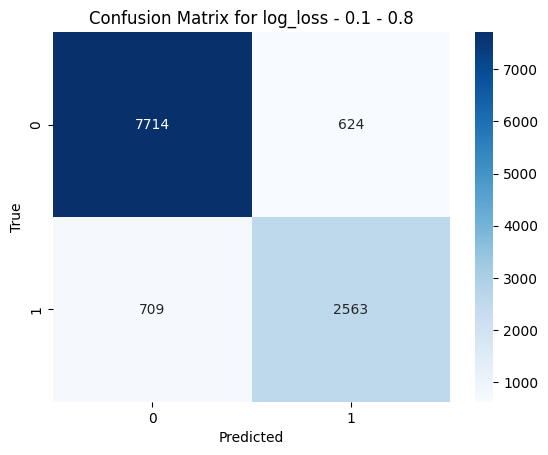


Classification Report for log_loss - 0.01:
              precision    recall  f1-score   support

       False       0.90      0.93      0.92      8338
        True       0.80      0.74      0.77      3272

    accuracy                           0.88     11610
   macro avg       0.85      0.83      0.84     11610
weighted avg       0.87      0.88      0.87     11610


ROC-AUC Score: 0.9469970532883003



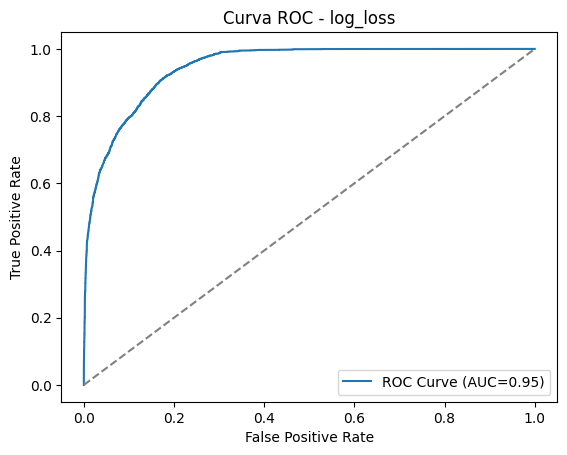


Classification Report for log_loss - 0.01:
              precision    recall  f1-score   support

       False       0.90      0.93      0.92      8338
        True       0.80      0.74      0.77      3272

    accuracy                           0.88     11610
   macro avg       0.85      0.83      0.84     11610
weighted avg       0.87      0.88      0.87     11610


ROC-AUC Score: 0.9467648483597352



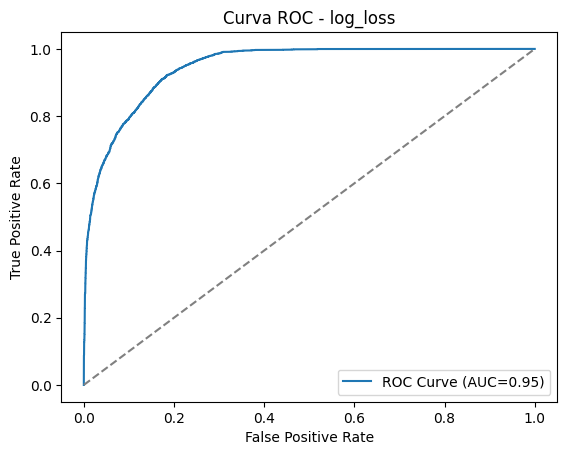


Classification Report for log_loss - 0.01:
              precision    recall  f1-score   support

       False       0.90      0.93      0.91      8338
        True       0.80      0.74      0.77      3272

    accuracy                           0.88     11610
   macro avg       0.85      0.84      0.84     11610
weighted avg       0.87      0.88      0.87     11610


ROC-AUC Score: 0.9468108128396753



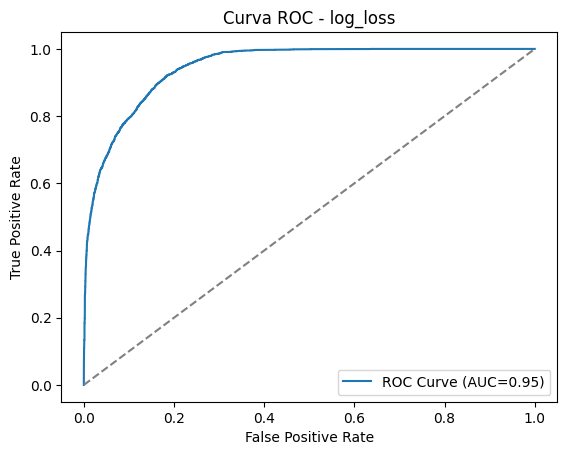

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# Definir los hiperparámetros a iterar
param_grid_gb = {
    'n_estimators': [500],  # Fijo en 500
    'learning_rate': [0.01, 0.1],  # Menos combinaciones
    'loss': ['log_loss'],  # Cambiar 'deviance' a 'log_loss'
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_depth': [7],  # Profundidades limitadas
    'subsample': [0.8],  # Submuestra fija para evitar sobreajuste
}

# Almacenar resultados y modelos
results_gb = []
models_dict_gb = {}

# Iterar sobre todas las combinaciones de hiperparámetros
for params in product(*param_grid_gb.values()):
    n_estimators, learning_rate, loss, min_samples_split, min_samples_leaf, max_depth, subsample = params

    # Construir el modelo Gradient Boosting con los hiperparámetros actuales
    model_gb = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        loss=loss,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_depth=max_depth,
        subsample=subsample,
        random_state=42
    )

    # Entrenar el modelo
    model_gb.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model_gb.predict(X_test)

    # Calcular métricas
    precision = precision_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Calcular ROC-AUC si hay más de una clase
    if len(np.unique(y_test)) > 1:
        y_pred_proba = model_gb.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None

    # Validación cruzada
    cv_scores = cross_val_score(model_gb, X_train, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)

    # Calcular Train Score
    train_score = model_gb.score(X_train, y_train)

    # Determinar si hay sobreajuste
    if train_score > 1.5 * mean_cv_score:
        overfitting_warning = "SEVERE OVERFITTING"
    elif train_score > 1.2 * mean_cv_score:
        overfitting_warning = "DANGER"
    elif train_score > 1.1 * mean_cv_score:
        overfitting_warning = "MILD OVERFITTING"
    else:
        overfitting_warning = "OK"

    # Generar un ID único para el modelo
    model_id = f"{n_estimators}_{learning_rate}_{loss}_{min_samples_split}_{min_samples_leaf}_{max_depth}_{subsample}"
    
    # Guardar el modelo en el diccionario
    models_dict_gb[model_id] = model_gb

    # Guardar los resultados
    results_gb.append({
        'model_id': model_id,
        'n_estimators': n_estimators,
        'learning_rate': learning_rate,
        'loss': loss,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'max_depth': max_depth,
        'subsample': subsample,
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'roc_auc': roc_auc,
        'cv_score': mean_cv_score,
        'train_score': train_score,
        'overfitting': overfitting_warning
    })

    # Imprimir resultados parciales durante la iteración
    print(f"n_estimators: {n_estimators}, learning_rate: {learning_rate}, loss: {loss}, min_samples_split: {min_samples_split}, min_samples_leaf: {min_samples_leaf}, max_depth: {max_depth}, subsample: {subsample}")
    print(f"Precision: {precision}, Accuracy: {accuracy}, F1 Score: {f1}, Recall: {recall}, ROC-AUC: {roc_auc}, CV Score: {mean_cv_score}, Train Score: {train_score}, Overfitting: {overfitting_warning}")

# Convertir resultados a DataFrame y seleccionar los 3 mejores modelos
results_gb_df = pd.DataFrame(results_gb)
results_gb_df = results_gb_df.sort_values(by=['f1_score'], ascending=False)

# Seleccionar el mejor modelo sin sobreajuste y optimizando F1 Score
best_models_gb = results_gb_df[results_gb_df['overfitting'] == 'OK'].head(3)

# Imprimir los mejores modelos usando los modelos guardados
for index, row in best_models_gb.iterrows():
    model_id = row['model_id']
    current_model = models_dict_gb[model_id]
    y_pred = current_model.predict(X_test)
    
    print(f'\nClassification Report for {row["loss"]} - {row["learning_rate"]}:')
    print(classification_report(y_test, y_pred))
    
    if len(np.unique(y_test)) > 1:
        y_pred_proba = current_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f'\nROC-AUC Score: {roc_auc}\n')
        
        # Curva ROC
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Curva ROC - {row["loss"]}')
        plt.legend()
        plt.show()

        # Matriz de confusión
        plt.figure()
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Matriz de Confusión - {row["criterion"]}')
        plt.show()  
        
# Mostrar los mejores modelos
from IPython.display import display
display(best_models_rf)

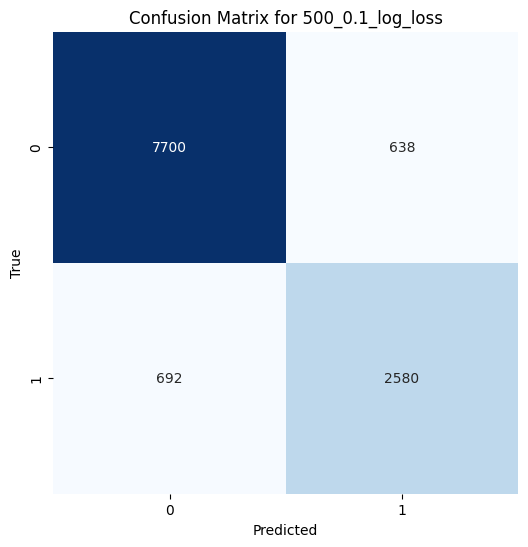


Classification Report for 500_0.1_log_loss:
              precision    recall  f1-score   support

       False       0.92      0.92      0.92      8338
        True       0.80      0.79      0.80      3272

    accuracy                           0.89     11610
   macro avg       0.86      0.86      0.86     11610
weighted avg       0.88      0.89      0.89     11610



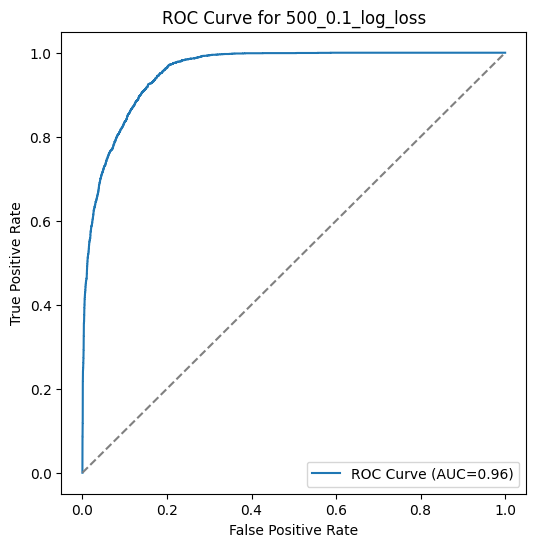

,model_id,accuracy,f1_score,recall,roc_auc,train_score,overfitting


In [153]:
############# igual
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# Definir los hiperparámetros fijos (sin cambios)
param_grid_gb = {
    'n_estimators': [500],  # Número original de árboles
    'learning_rate': [0.1],  # Usar solo 0.1 como en el ejemplo
    'loss': ['log_loss'],  # Cambiar 'deviance' a 'log_loss'
    'min_samples_split': [2],  # Fijo en 2
    'min_samples_leaf': [2],  # Fijo en 2
    'max_depth': [7],  # Profundidades limitadas
    'subsample': [0.8],  # Submuestra fija para evitar sobreajuste
}

# Almacenar resultados y modelos
results_gb = []
models_dict_gb = {}

# Iterar sobre las combinaciones de hiperparámetros (ahora solo se ejecutará una vez por cada combinación)
for params in product(*param_grid_gb.values()):
    n_estimators, learning_rate, loss, min_samples_split, min_samples_leaf, max_depth, subsample = params

    # Construir el modelo Gradient Boosting con los hiperparámetros actuales
    model_gb = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        loss=loss,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_depth=max_depth,
        subsample=subsample,
        random_state=42
    )

    # Entrenar el modelo
    model_gb.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model_gb.predict(X_test)

    # Calcular métricas
    precision = precision_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Calcular ROC-AUC si hay más de una clase
    if len(np.unique(y_test)) > 1:
        y_pred_proba = model_gb.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None

    # Calcular Train Score
    train_score = model_gb.score(X_train, y_train)

    # Determinar si hay sobreajuste
    if train_score > 1.5 * mean_cv_score:
        overfitting_warning = "SEVERE OVERFITTING"
    elif train_score > 1.2 * mean_cv_score:
        overfitting_warning = "DANGER"
    elif train_score > 1.1 * mean_cv_score:
        overfitting_warning = "MILD OVERFITTING"
    else:
        overfitting_warning = "OK"

    # Guardar los resultados
    results_gb.append({
        'model_id': f"{n_estimators}_{learning_rate}_{loss}_{min_samples_split}_{min_samples_leaf}_{max_depth}_{subsample}",
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'roc_auc': roc_auc,
        'train_score': train_score,
        'overfitting': overfitting_warning
    })

    # Mostrar la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {n_estimators}_{learning_rate}_{loss}')
    plt.show()

    # Mostrar el reporte de clasificación
    print(f"\nClassification Report for {n_estimators}_{learning_rate}_{loss}:")
    print(classification_report(y_test, y_pred))

    # Mostrar la curva ROC si hay más de una clase
    if len(np.unique(y_test)) > 1:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {n_estimators}_{learning_rate}_{loss}')
        plt.legend()
        plt.show()

# Convertir resultados a DataFrame
results_gb_df = pd.DataFrame(results_gb)

# Si hay resultados, mostrar los mejores modelos
if not results_gb_df.empty:
    # Ordenar por F1 Score
    results_gb_df = results_gb_df.sort_values(by=['f1_score'], ascending=False)

    # Mostrar los 3 mejores modelos sin sobreajuste
    best_models_gb = results_gb_df[results_gb_df['overfitting'] == 'OK'].head(3)
    
    from IPython.display import display
    display(best_models_gb)
else:
    print("No se encontraron resultados.")


In [154]:
###### igual
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# Definir los hiperparámetros a iterar
param_grid_gb = {
    'n_estimators': [500],  # Fijo en 500
    'learning_rate': [0.1],  # Menos combinaciones
    'loss': ['log_loss'],  # Cambiar 'deviance' a 'log_loss'
    'min_samples_split': [2],
    'min_samples_leaf': [2],
    'max_depth': [7],  # Profundidades limitadas
    'subsample': [0.8],  # Submuestra fija para evitar sobreajuste
}

# Almacenar resultados y modelos
results_gb = []
models_dict_gb = {}

# Iterar sobre todas las combinaciones de hiperparámetros
for params in product(*param_grid_gb.values()):
    n_estimators, learning_rate, loss, min_samples_split, min_samples_leaf, max_depth, subsample = params

    # Construir el modelo Gradient Boosting con los hiperparámetros actuales
    model_gb = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        loss=loss,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_depth=max_depth,
        subsample=subsample,
        random_state=42
    )

    # Entrenar el modelo
    model_gb.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model_gb.predict(X_test)

    # Calcular métricas
    precision = precision_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Calcular ROC-AUC si hay más de una clase
    if len(np.unique(y_test)) > 1:
        y_pred_proba = model_gb.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None

    # Validación cruzada
    cv_scores = cross_val_score(model_gb, X_train, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)

    # Calcular Train Score
    train_score = model_gb.score(X_train, y_train)

    # Determinar si hay sobreajuste
    if train_score > 1.5 * mean_cv_score:
        overfitting_warning = "SEVERE OVERFITTING"
    elif train_score > 1.2 * mean_cv_score:
        overfitting_warning = "DANGER"
    elif train_score > 1.1 * mean_cv_score:
        overfitting_warning = "MILD OVERFITTING"
    else:
        overfitting_warning = "OK"

    # Generar un ID único para el modelo
    model_id = f"{n_estimators}_{learning_rate}_{loss}_{min_samples_split}_{min_samples_leaf}_{max_depth}_{subsample}"
    
    # Guardar el modelo en el diccionario
    models_dict_gb[model_id] = model_gb

    # Guardar los resultados
    results_gb.append({
        'model_id': model_id,
        'n_estimators': n_estimators,
        'learning_rate': learning_rate,
        'loss': loss,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'max_depth': max_depth,
        'subsample': subsample,
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'roc_auc': roc_auc,
        'cv_score': mean_cv_score,
        'train_score': train_score,
        'overfitting': overfitting_warning
    })

    # Imprimir resultados parciales durante la iteración
    print(f"n_estimators: {n_estimators}, learning_rate: {learning_rate}, loss: {loss}, min_samples_split: {min_samples_split}, min_samples_leaf: {min_samples_leaf}, max_depth: {max_depth}, subsample: {subsample}")
    print(f"Precision: {precision}, Accuracy: {accuracy}, F1 Score: {f1}, Recall: {recall}, ROC-AUC: {roc_auc}, CV Score: {mean_cv_score}, Train Score: {train_score}, Overfitting: {overfitting_warning}")

# Convertir resultados a DataFrame y seleccionar los 3 mejores modelos
results_gb_df = pd.DataFrame(results_gb)
results_gb_df = results_gb_df.sort_values(by=['f1_score'], ascending=False)

# Seleccionar el mejor modelo sin sobreajuste y optimizando F1 Score
best_models_gb = results_gb_df[results_gb_df['overfitting'] == 'OK'].head(3)

# Imprimir los mejores modelos usando los modelos guardados
for index, row in best_models_gb.iterrows():
    model_id = row['model_id']
    current_model = models_dict_gb[model_id]
    y_pred = current_model.predict(X_test)
    
    print(f'\nClassification Report for {row["loss"]} - {row["learning_rate"]}:')
    print(classification_report(y_test, y_pred))
    
    if len(np.unique(y_test)) > 1:
        y_pred_proba = current_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f'\nROC-AUC Score: {roc_auc}\n')
        
        # Curva ROC
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Curva ROC - {row["loss"]}')
        plt.legend()
        plt.show()

        # Matriz de confusión
        plt.figure()
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Matriz de Confusión - {row["criterion"]}')
        plt.show()  
        
# Mostrar los mejores modelos
from IPython.display import display
display(best_models_rf)

n_estimators: 500, learning_rate: 0.1, loss: log_loss, min_samples_split: 2, min_samples_leaf: 2, max_depth: 7, subsample: 0.8
Precision: 0.8849049770553756, Accuracy: 0.8854435831180018, F1 Score: 0.885151879037518, Recall: 0.8854435831180018, ROC-AUC: 0.9566402472317214, CV Score: 0.8751479915011835, Train Score: 0.9849479962962165, Overfitting: MILD OVERFITTING


,model_id,n_estimators,max_depth,min_samples_split,min_samples_leaf,criterion,max_features,accuracy,f1_score,recall,roc_auc,cv_score,train_score,overfitting
0,500_7_2_1_entropy_sqrt,500,7,2,1,entropy,sqrt,0.788803,0.797680,0.788803,0.896303,0.791318,0.794720,OK
2,500_7_2_2_entropy_sqrt,500,7,2,2,entropy,sqrt,0.788458,0.797378,0.788458,0.896429,0.791705,0.794311,OK
4,500_7_5_1_entropy_sqrt,500,7,5,1,entropy,sqrt,0.788028,0.796934,0.788028,0.896730,0.791382,0.794591,OK


## 3. XGBoost


Classification Report for SAMME - 0.1:
              precision    recall  f1-score   support

       False       0.81      0.93      0.86      8338
        True       0.71      0.43      0.53      3272

    accuracy                           0.79     11610
   macro avg       0.76      0.68      0.70     11610
weighted avg       0.78      0.79      0.77     11610


ROC-AUC Score: 0.8497588844134816



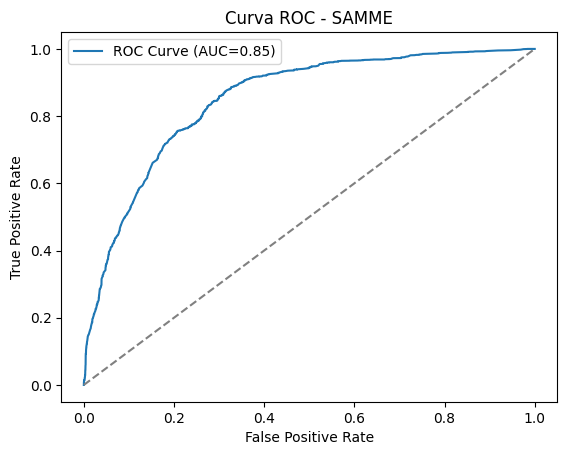


Classification Report for SAMME - 0.01:
              precision    recall  f1-score   support

       False       0.76      0.97      0.85      8338
        True       0.74      0.22      0.33      3272

    accuracy                           0.76     11610
   macro avg       0.75      0.59      0.59     11610
weighted avg       0.75      0.76      0.71     11610


ROC-AUC Score: 0.8216671646762899



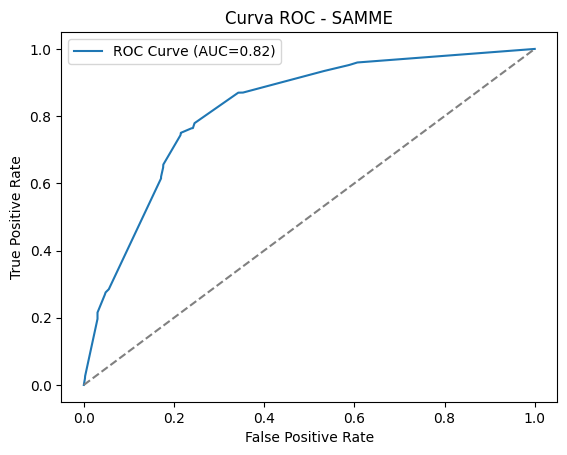

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# Definir los hiperparámetros a iterar
param_grid_ab = {
    'n_estimators': [500],  # Fijo en 500
    'learning_rate': [0.01, 0.1],  # Menos combinaciones
    'algorithm': ['SAMME'],  # Algoritmo más eficiente
}

# Almacenar resultados y modelos
results_ab = []
models_dict_ab = {}

# Iterar sobre todas las combinaciones de hiperparámetros
for params in product(*param_grid_ab.values()):
    n_estimators, learning_rate, algorithm = params

    # Construir el modelo AdaBoost con los hiperparámetros actuales
    model_ab = AdaBoostClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        algorithm=algorithm,
        random_state=42
    )

    # Entrenar el modelo
    model_ab.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model_ab.predict(X_test)

    # Calcular métricas
    precision = precision_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Calcular ROC-AUC si hay más de una clase
    if len(np.unique(y_test)) > 1:
        y_pred_proba = model_ab.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None

    # Validación cruzada
    cv_scores = cross_val_score(model_ab, X_train, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)

    # Calcular Train Score
    train_score = model_ab.score(X_train, y_train)

    # Determinar si hay sobreajuste
    if train_score > 1.5 * mean_cv_score:
        overfitting_warning = "SEVERE OVERFITTING"
    elif train_score > 1.2 * mean_cv_score:
        overfitting_warning = "DANGER"
    elif train_score > 1.1 * mean_cv_score:
        overfitting_warning = "MILD OVERFITTING"
    else:
        overfitting_warning = "OK"

    # Generar un ID único para el modelo
    model_id = f"{n_estimators}_{learning_rate}_{algorithm}"
    
    # Guardar el modelo en el diccionario
    models_dict_ab[model_id] = model_ab

    # Guardar los resultados
    results_ab.append({
        'model_id': model_id,
        'n_estimators': n_estimators,
        'learning_rate': learning_rate,
        'algorithm': algorithm,
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'roc_auc': roc_auc,
        'cv_score': mean_cv_score,
        'train_score': train_score,
        'overfitting': overfitting_warning
    })

    # Imprimir resultados parciales
    print(f"n_estimators: {n_estimators}, learning_rate: {learning_rate}, algorithm: {algorithm}")
    print(f"Precision: {precision}, Accuracy: {accuracy}, F1 Score: {f1}, Recall: {recall}, ROC-AUC: {roc_auc}, CV Score: {mean_cv_score}, Train Score: {train_score}, Overfitting: {overfitting_warning}")

# Convertir resultados a DataFrame y seleccionar los 3 mejores modelos
results_ab_df = pd.DataFrame(results_ab)
results_ab_df = results_ab_df.sort_values(by=['f1_score'], ascending=False)

# Seleccionar el mejor modelo sin sobreajuste y optimizando F1 Score
best_models_ab = results_ab_df[results_ab_df['overfitting'] == 'OK'].head(3)

# Imprimir los mejores modelos usando los modelos guardados
for index, row in best_models_ab.iterrows():
    model_id = row['model_id']
    current_model = models_dict_ab[model_id]
    y_pred = current_model.predict(X_test)
    
    print(f'\nClassification Report for {row["algorithm"]} - {row["learning_rate"]}:')
    print(classification_report(y_test, y_pred))
    if len(np.unique(y_test)) > 1:
        y_pred_proba = current_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f'\nROC-AUC Score: {roc_auc}\n')
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Curva ROC - {row["algorithm"]}')
        plt.legend()
        plt.show()
        
        # Matriz de confusión
        plt.figure()
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Matriz de Confusión - {row["criterion"]}')
        plt.show()  
        
# Mostrar los mejores modelos
from IPython.display import display
display(best_models_rf)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# Definir los hiperparámetros a iterar
param_grid_xgb = {
    'n_estimators': [500],  # Fijo en 500
    'learning_rate': [0.01, 0.1],  # Menos combinaciones
    'max_depth': [3, 5],  # Profundidades limitadas
    'subsample': [0.8],  # Submuestra fija
    'colsample_bytree': [0.8],  # Usar 80% de las características por árbol
    'gamma': [0],  # Regularización básica
}

# Almacenar resultados y modelos
results_xgb = []
models_dict_xgb = {}

# Iterar sobre todas las combinaciones de hiperparámetros
for params in product(*param_grid_xgb.values()):
    n_estimators, learning_rate, max_depth, subsample, colsample_bytree, gamma = params

    # Construir el modelo XGBoost con los hiperparámetros actuales
    model_xgb = xgb.XGBClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        random_state=42
    )

    # Entrenar el modelo
    model_xgb.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model_xgb.predict(X_test)

    # Calcular métricas
    precision = precision_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Calcular ROC-AUC si hay más de una clase
    if len(np.unique(y_test)) > 1:
        y_pred_proba = model_xgb.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None

    # Validación cruzada
    cv_scores = cross_val_score(model_xgb, X_train, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)

    # Calcular Train Score
    train_score = model_xgb.score(X_train, y_train)

    # Determinar si hay sobreajuste
    if train_score > 1.5 * mean_cv_score:
        overfitting_warning = "SEVERE OVERFITTING"
    elif train_score > 1.2 * mean_cv_score:
        overfitting_warning = "DANGER"
    elif train_score > 1.1 * mean_cv_score:
        overfitting_warning = "MILD OVERFITTING"
    else:
        overfitting_warning = "OK"

    # Generar un ID único para el modelo
    model_id = f"{n_estimators}_{learning_rate}_{max_depth}_{subsample}_{gamma}"
    
    # Guardar el modelo en el diccionario
    models_dict_xgb[model_id] = model_xgb

    # Guardar los resultados
    results_xgb.append({
        'model_id': model_id,
        'n_estimators': n_estimators,
        'learning_rate': learning_rate,
        'max_depth': max_depth,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'gamma': gamma,
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'roc_auc': roc_auc,
        'cv_score': mean_cv_score,
        'train_score': train_score,
        'overfitting': overfitting_warning
    })

    # Imprimir resultados parciales durante la iteración
    print(f"n_estimators: {n_estimators}, learning_rate: {learning_rate}, max_depth: {max_depth}, subsample: {subsample}, gamma: {gamma}")
    print(f"Precision: {precision}, Accuracy: {accuracy}, F1 Score: {f1}, Recall: {recall}, ROC-AUC: {roc_auc}, CV Score: {mean_cv_score}, Train Score: {train_score}, Overfitting: {overfitting_warning}")

  

# Convertir resultados a DataFrame y seleccionar los 3 mejores modelos
results_xgb_df = pd.DataFrame(results_xgb)
results_xgb_df = results_xgb_df.sort_values(by=['f1_score'], ascending=False)

# Seleccionar el mejor modelo sin sobreajuste y optimizando F1 Score
best_models_xgb = results_xgb_df[results_xgb_df['overfitting'] == 'OK'].head(3)

# Imprimir los mejores modelos usando los modelos guardados
for index, row in best_models_xgb.iterrows():
    model_id = row['model_id']
    current_model = models_dict_xgb[model_id]
    y_pred = current_model.predict(X_test)
    
    print(f'\nClassification Report for {row["max_depth"]} - {row["subsample"]}:')
    print(classification_report(y_test, y_pred))
    if len(np.unique(y_test)) > 1:
        y_pred_proba = current_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f'\nROC-AUC Score: {roc_auc}\n')
        
        # Curva ROC
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Curva ROC - {row["max_depth"]}')
        plt.legend()
        plt.show()

        # Matriz de confusión
        plt.figure()
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Matriz de Confusión - {row["criterion"]}')
        plt.show()  
        
# Mostrar los mejores modelos
from IPython.display import display
display(best_models_rf)
        


n_estimators: 500, learning_rate: 0.01, max_depth: 3, subsample: 0.8, gamma: 0
Precision: 0.8242265802925558, Accuracy: 0.8274763135228251, F1 Score: 0.8254619187810882, Recall: 0.8274763135228251, ROC-AUC: 0.8972381578785318, CV Score: 0.8257714376101294, Train Score: 0.826223648226706, Overfitting: OK
n_estimators: 500, learning_rate: 0.01, max_depth: 5, subsample: 0.8, gamma: 0
Precision: 0.8551536076616589, Accuracy: 0.8585701981050818, F1 Score: 0.8556392585450545, Recall: 0.8585701981050818, ROC-AUC: 0.9314145814285321, CV Score: 0.8515041401078648, Train Score: 0.8586532871078189, Overfitting: OK
n_estimators: 500, learning_rate: 0.1, max_depth: 3, subsample: 0.8, gamma: 0
Precision: 0.8567958636953881, Accuracy: 0.8592592592592593, F1 Score: 0.8576084955822448, Recall: 0.8592592592592593, ROC-AUC: 0.9370903516524636, CV Score: 0.8571889525956976, Train Score: 0.8679342793772475, Overfitting: OK


KeyboardInterrupt: 